In [1]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib.pylab as plt2

#Importing the data
    
file = "C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Grover//Grover Pricing 2.xlsx"
xls = pd.ExcelFile(file)
print(xls.sheet_names)

df = xls.parse(1, skiprows=[1], names = ["Ranking", "Cat", "Brand", "Rentals", "Returns", "Page_views", "Market_price", "1M_price", "3M_price", "6M_price", "12M_price"])

['Task', 'DATA']


In [181]:
# This is what our data looks like. It describes performance of different items (rentals and returns, prices discount) over 6 monthts

df.head(10)

,Ranking,Cat,Brand,Rentals,Returns,Page_views,Market_price,1M_price,3M_price,6M_price,...,3M_vs_mp,6M_vs_mp,12M_vs_mp,subs_tobuy_new_1M,subs_tobuy_new_3M,subs_tobuy_new_6M,subs_tobuy_new_12M,Price_class,Price_bucket,rr_ratio
0,1,phones-and-tablets/smartphones,samsung,143,67,13902,899.0,"79.9, 99.9","59.9, 79.9","49.9, 69.9",...,0.266630,0.466518,0.799555,9.0,4.0,2.0,1.0,btwn 0.5-0.7 of mp,btwn 750-1000,btwn 2 and 5
1,2,gaming-and-vr/virtual-reality,oculus,271,265,5019,494.0,59.9,44.9,34.9,...,0.272672,0.423887,0.726316,8.0,4.0,2.0,1.0,btwn 0.5-0.7 of mp,btwn 300-500,btwn 1 and 2
2,3,phones-and-tablets/smartphones,samsung,288,32,12022,749.0,"49.9, 89.9","39.9, 69.9","29.9, 59.9",...,0.279973,0.479840,0.799466,8.0,4.0,2.0,1.0,btwn 0.5-0.7 of mp,btwn 500-750,btwn 5 and 10
3,4,gaming-and-vr/virtual-reality,oculus,239,161,4366,494.0,59.9,44.9,34.9,...,0.272672,0.423887,0.726316,8.0,4.0,2.0,1.0,btwn 0.5-0.7 of mp,btwn 300-500,btwn 1 and 2
4,5,gaming-and-vr/gaming-consoles,nintendo,299,244,7842,346.0,34.9,24.9,19.9,...,0.215896,0.345087,0.620809,10.0,5.0,3.0,2.0,btwn 0.3-0.5 of mp,btwn 300-500,btwn 1 and 2
5,6,gaming-and-vr/gaming-consoles,sony,258,253,13338,439.0,44.9,34.9,27.9,...,0.238497,0.381321,0.625968,10.0,4.0,3.0,2.0,btwn 0.3-0.5 of mp,btwn 300-500,btwn 1 and 2
6,7,phones-and-tablets/smartphones,samsung,41,35,4898,1249.0,"119.9, 129.9","89.9, 99.9","79.9, 89.9",...,0.239952,0.431865,0.767654,10.0,4.0,2.0,1.0,btwn 0.5-0.7 of mp,btwn 1000-1500,btwn 1 and 2
7,8,cameras/action-cameras,gopro,455,412,9325,394.0,59.9,44.9,34.9,...,0.341878,0.531472,0.910660,7.0,3.0,2.0,1.0,btwn 0.7-0.9 of mp,btwn 300-500,btwn 1 and 2
8,9,drones/for-pro,dji,460,216,16003,1567.0,"149.9, 189.9","119.9, 149.9","99.9, 129.9",...,0.286981,0.497384,0.841608,8.0,3.0,2.0,1.0,btwn 0.5-0.7 of mp,btwn 1500-2000,btwn 2 and 5
9,10,computers/laptops,apple,64,9,2424,3299.0,299.9,219.9,199.9,...,0.199970,0.363565,0.618005,11.0,5.0,3.0,2.0,btwn 0.3-0.5 of mp,More than 2000,btwn 5 and 10


In [5]:
#Analyzing the data globally, columns and datatypes

df.head()
df.shape
df.dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       2139 non-null   int64  
 1   Cat           2139 non-null   object 
 2   Brand         2139 non-null   object 
 3   Rentals       2139 non-null   int64  
 4   Returns       2093 non-null   float64
 5   Page_views    2139 non-null   int64  
 6   Market_price  2139 non-null   float64
 7   1M_price      2139 non-null   object 
 8   3M_price      2139 non-null   object 
 9   6M_price      2139 non-null   object 
 10  12M_price     2139 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 183.9+ KB


,Ranking,Rentals,Returns,Page_views,Market_price
count,2139.000000,2139.000000,2093.000000,2139.000000,2139.000000
mean,1070.000000,6.860683,5.511228,312.669004,820.191398
std,617.620434,28.967810,22.041385,1041.865300,726.306043
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,535.500000,0.000000,0.000000,14.000000,286.000000
50%,1070.000000,0.000000,0.000000,59.000000,579.000000
75%,1604.500000,2.000000,2.000000,194.000000,1147.000000
max,2139.000000,460.000000,412.000000,16003.000000,4834.000000


In [6]:
#Do we have any null values we should be worried about?
    
df.isnull().sum()

Ranking          0
Cat              0
Brand            0
Rentals          0
Returns         46
Page_views       0
Market_price     0
1M_price         0
3M_price         0
6M_price         0
12M_price        0
dtype: int64

In [7]:
#We do, so let's replace null values for 0 in this case

df.loc[df.Returns.isnull(), ["Returns"]] = 0

In [8]:
#Let's see if it worked
    
df.isnull().sum()

Ranking         0
Cat             0
Brand           0
Rentals         0
Returns         0
Page_views      0
Market_price    0
1M_price        0
3M_price        0
6M_price        0
12M_price       0
dtype: int64

In [9]:
#Perfect, no null values, what about duplicates?
    
duplicates = df.duplicated() #goes row by row, creates a Series with True if duplicate, False otherwise
duplicates.sum() #the Sum of the series is 0, which means there are no True values, and that there are no duplicate rows
df[duplicates] #trying to get the rows that are True, but we get an empty df

,Ranking,Cat,Brand,Rentals,Returns,Page_views,Market_price,1M_price,3M_price,6M_price,12M_price


In [10]:
#We need to change a couple of columns types with .astype, to work with correct data
    
df.dtypes
df["Ranking"] = df["Ranking"].astype("object")
df["Returns"] = df["Returns"].astype("int64")
df["1M_price"] = df["1M_price"].astype("str")
df["3M_price"] = df["3M_price"].astype("str")
df["6M_price"] = df["6M_price"].astype("str")
df["12M_price"] = df["12M_price"].astype("str")

df.dtypes

Ranking          object
Cat              object
Brand            object
Rentals           int64
Returns           int64
Page_views        int64
Market_price    float64
1M_price         object
3M_price         object
6M_price         object
12M_price        object
dtype: object

In [11]:
#Let's split the Cat column to break it down into Category - Subcategory
    
df[["Category", "Subcategory"]] = df["Cat"].str.split("/",expand=True)

In [20]:
#Make sure everything went smoothly, no null values and correct datatype

print(df["Category"].isnull().sum(), "\n\n", df["Subcategory"].isnull().sum(), "\n\n", df.dtypes)

0 

 0 

 Ranking          object
Cat              object
Brand            object
Rentals           int64
Returns           int64
Page_views        int64
Market_price    float64
1M_price         object
3M_price         object
6M_price         object
12M_price        object
Category         object
Subcategory      object
dtype: object


In [21]:
#Let's count how many items have 1M, 3M, 6M and 12M discounts
    
items_1M_dis = df["1M_price"].str.contains(", ").sum() #146 items with discount
items_3M_dis = df["3M_price"].str.contains(", ").sum() #158 items with discount
items_6M_dis = df["6M_price"].str.contains(", ").sum() #162 items with discount
items_12M_dis = df["12M_price"].str.contains(", ").sum() #163 items with discount

In [22]:
  #Let's create a column that will tell you whether each item has a discount at 1M, 3M, 6M, 12M
    
df["1M_dis?"] ="No"
df["3M_dis?"] ="No"
df["6M_dis?"] ="No"
df["12M_dis?"] ="No"

df.dtypes

Ranking          object
Cat              object
Brand            object
Rentals           int64
Returns           int64
Page_views        int64
Market_price    float64
1M_price         object
3M_price         object
6M_price         object
12M_price        object
Category         object
Subcategory      object
1M_dis?          object
3M_dis?          object
6M_dis?          object
12M_dis?         object
dtype: object

In [23]:
for r in df.index:
    if ", " in df.iloc[r, 7]:
        df.iloc[r, 13] = "Yes"

for r in df.index:
    if ", " in df.iloc[r, 8]:
        df.iloc[r, 14] = "Yes"

for r in df.index:
    if ", " in df.iloc[r, 9]:
        df.iloc[r, 15] = "Yes"

for r in df.index:
    if ", " in df.iloc[r, 10]:
        df.iloc[r, 16] = "Yes"

In [24]:
#Let's split the price columns into full price - discounted price columns

m_prices = ["1M_price", "3M_price", "6M_price", "12M_price"]

for i in m_prices:
    df[[i + "_dis", i + "_full"]] = df[i].str.split(", ",expand=True)

In [ ]:
#Now, for the products that have NO discount, we need to assign them the same price
#they have in the price_discount column, to get rid of None values

In [25]:
 #For 1M
    
for r in df.index:
    if (df.iloc[r, 13] == "No") & (df.iloc[r, 18] == None):
        df.iloc[r, 18] = df.iloc[r, 17 ]

    #For 3M

for r in df.index:
    if (df.iloc[r, 14] == "No") & (df.iloc[r, 20] == None):
        df.iloc[r, 20] = df.iloc[r, 19 ]

    #For 6M

for r in df.index:
    if (df.iloc[r, 15] == "No") & (df.iloc[r, 22] == None):
        df.iloc[r, 22] = df.iloc[r, 21 ]
   
    #For 12M        
   
for r in df.index:
    if (df.iloc[r, 16] == "No") & (df.iloc[r, 24] == None):
        df.iloc[r, 24] = df.iloc[r, 23 ]

In [26]:
#Now let's see the % of how important the discounts are, but first we have to make
#sure all of our prices are floats
    
df.dtypes

Ranking            object
Cat                object
Brand              object
Rentals             int64
Returns             int64
Page_views          int64
Market_price      float64
1M_price           object
3M_price           object
6M_price           object
12M_price          object
Category           object
Subcategory        object
1M_dis?            object
3M_dis?            object
6M_dis?            object
12M_dis?           object
1M_price_dis       object
1M_price_full      object
3M_price_dis       object
3M_price_full      object
6M_price_dis       object
6M_price_full      object
12M_price_dis      object
12M_price_full     object
dtype: object

In [27]:
we_need_floats = ["1M_price_dis", "1M_price_full", "3M_price_dis", "3M_price_full", "6M_price_dis", "6M_price_full", "12M_price_dis", "12M_price_full"]

for f in we_need_floats:
    df[f] = df[f].astype("float")
    
df.dtypes

Ranking            object
Cat                object
Brand              object
Rentals             int64
Returns             int64
Page_views          int64
Market_price      float64
1M_price           object
3M_price           object
6M_price           object
12M_price          object
Category           object
Subcategory        object
1M_dis?            object
3M_dis?            object
6M_dis?            object
12M_dis?           object
1M_price_dis      float64
1M_price_full     float64
3M_price_dis      float64
3M_price_full     float64
6M_price_dis      float64
6M_price_full     float64
12M_price_dis     float64
12M_price_full    float64
dtype: object

In [28]:
#Now, let's create the new columns for the calculation of the discount in %

period_list = ["1M", "3M", "6M", "12M"]
discount = "_price_dis"
full = "_price_full"

for p in period_list:
    df[p + "_dis_%"] = round((df[p + full]-df[p + discount])/df[p + discount], 2)

In [29]:
#Let's check for nulls because I saw some again
    
df["1M_dis_%"] = df["1M_dis_%"].fillna(0)
df["3M_dis_%"] = df["3M_dis_%"].fillna(0)
df["6M_dis_%"] = df["6M_dis_%"].fillna(0)
df["12M_dis_%"] = df["12M_dis_%"].fillna(0)

df.isnull().sum()

Ranking           0
Cat               0
Brand             0
Rentals           0
Returns           0
Page_views        0
Market_price      0
1M_price          0
3M_price          0
6M_price          0
12M_price         0
Category          0
Subcategory       0
1M_dis?           0
3M_dis?           0
6M_dis?           0
12M_dis?          0
1M_price_dis      0
1M_price_full     0
3M_price_dis      0
3M_price_full     0
6M_price_dis      0
6M_price_full     0
12M_price_dis     0
12M_price_full    0
1M_dis_%          0
3M_dis_%          0
6M_dis_%          0
12M_dis_%         0
dtype: int64

In [30]:
#Let's create one more column that tells us whether the item has discount in all 4 plans, or none of them

df["dis_4_plans?"] = "No discount on all 4 plans"

for r in df.index:
    if (df.iloc[r, 13] == "Yes") & (df.iloc[r, 14] == "Yes") & (df.iloc[r, 15] == "Yes") & (df.iloc[r, 16] == "Yes"):
        df.iloc[r, 29] = "Discount on all 4 plans!"

In [31]:
df["dis_0_plans?"] = "No discount on any of the 4 plans"

for r in df.index:
    if (df.iloc[r, 13] == "Yes") | (df.iloc[r, 14] == "Yes") | (df.iloc[r, 15] == "Yes") | (df.iloc[r, 16] == "Yes"):
        df.iloc[r, 30] = "Discount on at least 1 plan!"

In [35]:
# And how many have discounts in at least 1, but not the 4 periods?

df.loc[(df["dis_4_plans?"] == "No discount on all 4 plans") & \
       (df["dis_0_plans?"] == "Discount on at least 1 plan!"), :] 

,Ranking,Cat,Brand,Rentals,Returns,Page_views,Market_price,1M_price,3M_price,6M_price,...,6M_price_dis,6M_price_full,12M_price_dis,12M_price_full,1M_dis_%,3M_dis_%,6M_dis_%,12M_dis_%,dis_4_plans?,dis_0_plans?
84,85,home-entertainment/projectors,acer,219,209,4808,399.0,39.9,29.9,"22.9, 24.9",...,22.9,24.9,17.9,19.9,0.00,0.00,0.09,0.11,No discount on all 4 plans,Discount on at least 1 plan!
122,123,home-entertainment/tv,samsung,9,0,2915,1599.0,0,"124.9, 129.9","94.9, 99.9",...,94.9,99.9,74.9,79.9,0.00,0.04,0.05,0.07,No discount on all 4 plans,Discount on at least 1 plan!
123,124,home-entertainment/tv,samsung,2,0,904,1909.0,0,"129.9, 139.9","89.9, 109.9",...,89.9,109.9,69.9,89.9,0.00,0.08,0.22,0.29,No discount on all 4 plans,Discount on at least 1 plan!
345,346,cameras/lenses,nikon,25,16,421,327.0,39.9,"22.9, 24.9","17.9, 19.9",...,17.9,19.9,14.9,17.9,0.00,0.09,0.11,0.20,No discount on all 4 plans,Discount on at least 1 plan!
394,395,computers/gaming-computers,acer,2,7,115,1499.0,"129.9, 139.9",109.9,"89.9, 99.9",...,89.9,99.9,79.9,89.9,0.08,0.00,0.11,0.13,No discount on all 4 plans,Discount on at least 1 plan!
645,646,smart-home/light-and-electronics,amazon,0,2,102,167.0,22.9,"14.9, 17.9","12.9, 14.9",...,12.9,14.9,11.9,12.9,0.00,0.20,0.16,0.08,No discount on all 4 plans,Discount on at least 1 plan!
810,811,phones-and-tablets/tablets,samsung,2,0,218,130.0,17.9,"12.9, 14.9","11.9, 12.9",...,11.9,12.9,7.9,9.9,0.00,0.16,0.08,0.25,No discount on all 4 plans,Discount on at least 1 plan!
955,956,gaming-and-vr/virtual-reality,samsung,2,7,198,115.0,9.9,7.9,"4.9, 6.9",...,4.9,6.9,3.9,4.9,0.00,0.00,0.41,0.26,No discount on all 4 plans,Discount on at least 1 plan!
976,977,computers/2-in-1-laptops,lenovo,0,0,67,1678.0,"129.9, 139.9",114.9,"89.9, 99.9",...,89.9,99.9,79.9,89.9,0.08,0.00,0.11,0.13,No discount on all 4 plans,Discount on at least 1 plan!
1064,1065,home-entertainment/home-cinema,LG,2,7,107,78.0,17.9,"11.9, 12.9","8.9, 9.9",...,8.9,9.9,4.9,5.9,0.00,0.08,0.11,0.20,No discount on all 4 plans,Discount on at least 1 plan!


In [ ]:
#there are only 23 items that have promotions in at least 1 period, but not in the 4 of them

In [36]:
#now let's look at the natural discount we give based on the duration of contracts
    
df["nat_dis_%_1to3"] = round((df["1M_price_full"] - df["3M_price_full"]) / df["1M_price_full"], 2)
df["nat_dis_%_3to6"] = round((df["3M_price_full"] - df["6M_price_full"]) / df["3M_price_full"], 2)
df["nat_dis_%_6to12"] = round((df["6M_price_full"] - df["12M_price_full"]) / df["6M_price_full"], 2)

In [37]:
#finally, let's look at how much the % of discount given varies with the subscription lengt
    
df["delta_dis_3vs1"] = df["3M_dis_%"]- df["1M_dis_%"]
df["delta_dis_6vs3"] = df["6M_dis_%"]- df["3M_dis_%"]
df["delta_dis_12vs6"] = df["12M_dis_%"]- df["6M_dis_%"]

In [38]:
#Let's make a ratio to see the relationship between rentals and returns (how many times more rentals than returns)
    
df["rent_vs_rtrn"] = round(df["Rentals"]/df["Returns"], 2)
df["rent_vs_rtrn"].unique()

df["rent_vs_rtrn"] = df["rent_vs_rtrn"].fillna(0)
df.loc[df["rent_vs_rtrn"] == np.inf, ["rent_vs_rtrn"]]= 2

In [39]:
#Now let's see how effective (or not) the webpage of each item is at sealing the deal
    
df["conversion"] = round(df["Rentals"]/df["Page_views"], 2)
df["conversion"].unique()

df["conversion"] = df["conversion"].fillna(0)
df.loc[df["conversion"] == np.inf, ["conversion"]]= 0

In [40]:
#Let's create some ratios that compare the market price with the renting price
    
df["1M_vs_mp"] = df["1M_price_full"]/df["Market_price"]
df["3M_vs_mp"] = (df["3M_price_full"]*3)/df["Market_price"]
df["6M_vs_mp"] = (df["6M_price_full"]*6)/df["Market_price"]
df["12M_vs_mp"] = (df["12M_price_full"]*12)/df["Market_price"]

In [41]:
#How many months at each price would one have to pay in order to be able to buy a new one?
    
df["subs_tobuy_new_1M"] = round(df["Market_price"]/df["1M_price_full"], 0)
df["subs_tobuy_new_3M"] = round(df["Market_price"]/(df["3M_price_full"]*3), 0)
df["subs_tobuy_new_6M"] = round(df["Market_price"]/(df["6M_price_full"]*6), 0)
df["subs_tobuy_new_12M"] = round(df["Market_price"]/(df["12M_price_full"]*12), 0)

<AxesSubplot:xlabel='Page_views', ylabel='Rentals'>

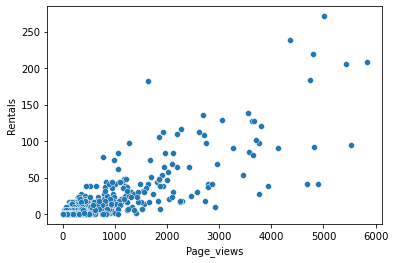

In [53]:
#Now, let's get into EDA.

# Starting with analyzing the relationship between page_views and rentals

sns.scatterplot(x="Page_views", y="Rentals", data=df.loc[df["Page_views"]<= 6000, :])

<AxesSubplot:xlabel='Page_views', ylabel='Rentals'>

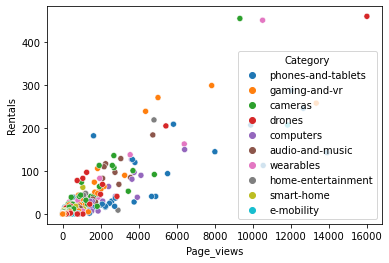

In [54]:
sns.scatterplot(x="Page_views", y="Rentals", data=df, hue="Category")

<AxesSubplot:xlabel='Page_views', ylabel='Rentals'>

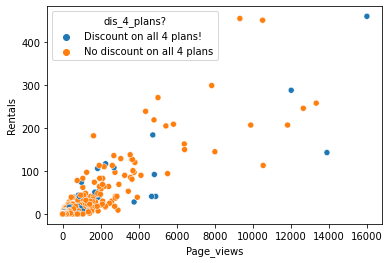

In [55]:
sns.scatterplot(x="Page_views", y="Rentals", data=df, hue="dis_4_plans?")

<AxesSubplot:xlabel='Page_views', ylabel='Rentals'>

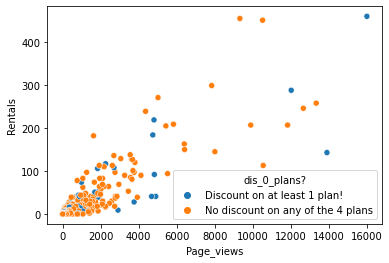

In [56]:
sns.scatterplot(x="Page_views", y="Rentals", data=df, hue="dis_0_plans?")

In [61]:
# Now let's look into relationship between the market price and number of rentals

<AxesSubplot:xlabel='Market_price', ylabel='Rentals'>

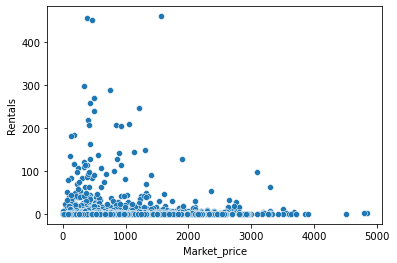

In [62]:
sns.scatterplot(x="Market_price", y="Rentals", data=df.loc[df["Rentals"]>= 0, :])

<AxesSubplot:xlabel='Market_price', ylabel='Rentals'>

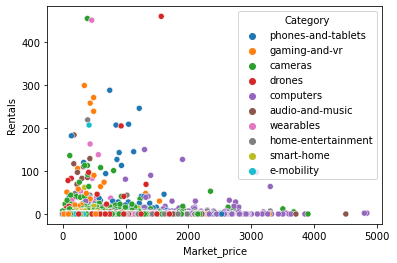

In [63]:
sns.scatterplot(x="Market_price", y="Rentals", data=df, hue="Category")

<AxesSubplot:xlabel='Market_price', ylabel='Rentals'>

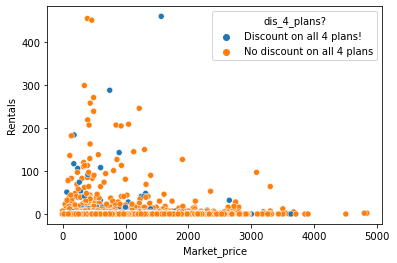

In [64]:
sns.scatterplot(x="Market_price", y="Rentals", data=df, hue="dis_4_plans?")

<AxesSubplot:xlabel='Market_price', ylabel='Rentals'>

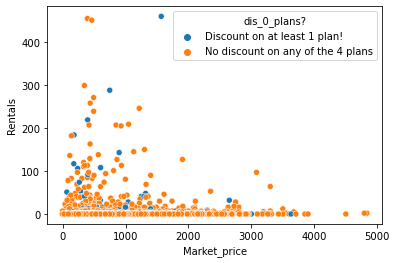

In [65]:
sns.scatterplot(x="Market_price", y="Rentals", data=df, hue="dis_0_plans?")

NameError: name 'xticklabels' is not defined

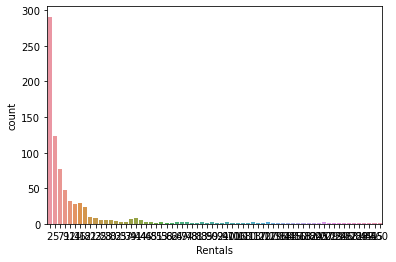

In [68]:
# How many items we have with x number of rentals?

sns.countplot(x="Rentals", data=df[df["Rentals"] != 0])

<AxesSubplot:xlabel='Returns', ylabel='count'>

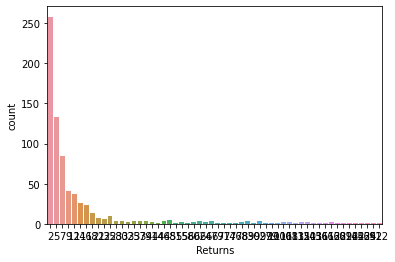

In [73]:
# How many items we have with x number of returns?

sns.countplot(x="Returns", data=df[df["Returns"] != 0])

<AxesSubplot:xlabel='Page_views', ylabel='count'>

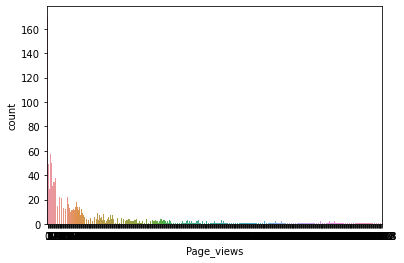

In [74]:
sns.countplot(x="Page_views", data=df)

<AxesSubplot:xlabel='Market_price', ylabel='count'>

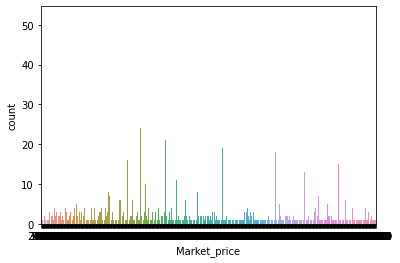

In [75]:
sns.countplot(x="Market_price", data=df)

<AxesSubplot:xlabel='Category', ylabel='count'>

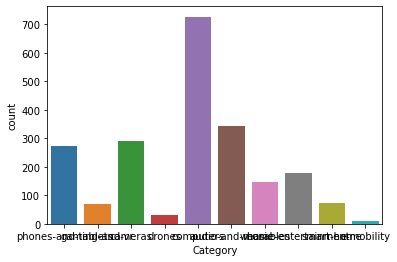

In [76]:
sns.countplot(x="Category", data=df)

<AxesSubplot:xlabel='dis_4_plans?', ylabel='count'>

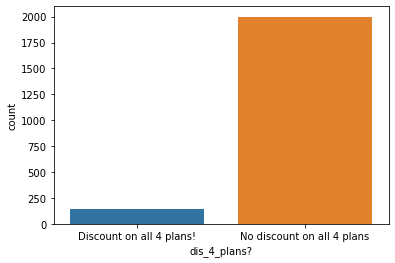

In [77]:
sns.countplot(x="dis_4_plans?", data=df)

<AxesSubplot:xlabel='dis_0_plans?', ylabel='count'>

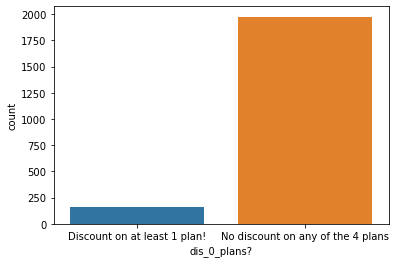

In [78]:
sns.countplot(x="dis_0_plans?", data=df)

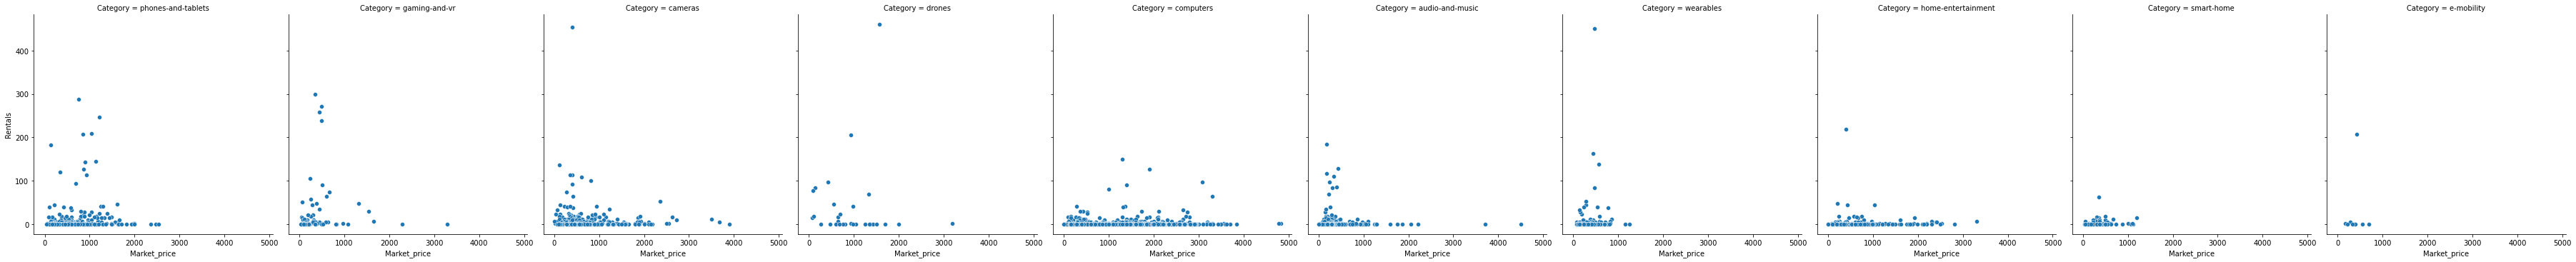

In [79]:
sns.relplot(x="Market_price", y="Rentals", data=df, kind="scatter", col="Category")

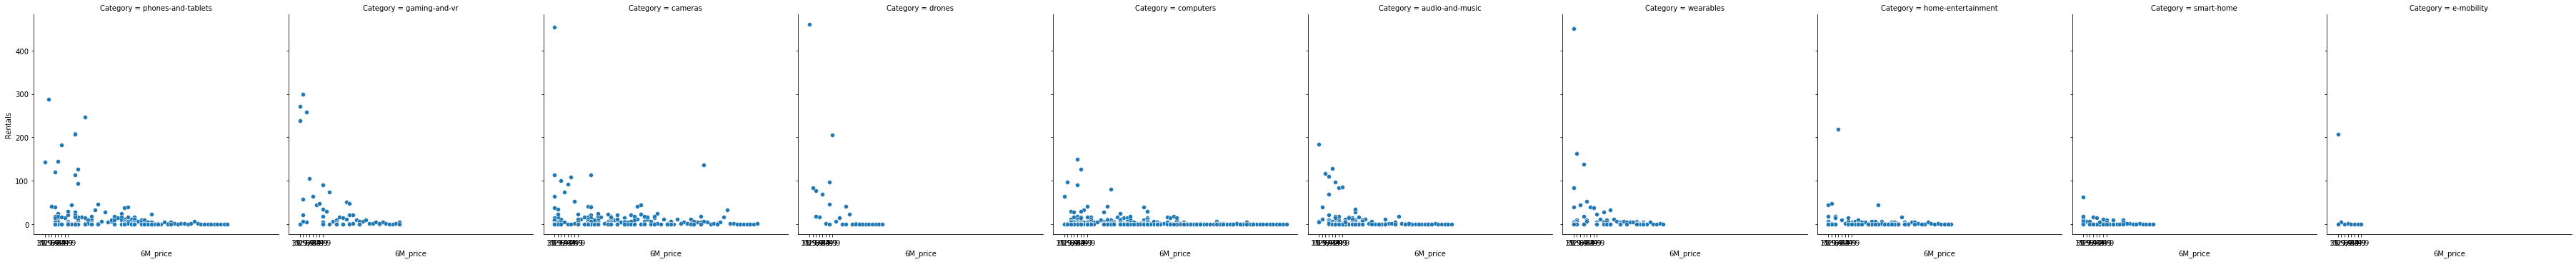

In [80]:
sns.relplot(x="6M_price", y="Rentals", data=df, kind="scatter", col="Category")

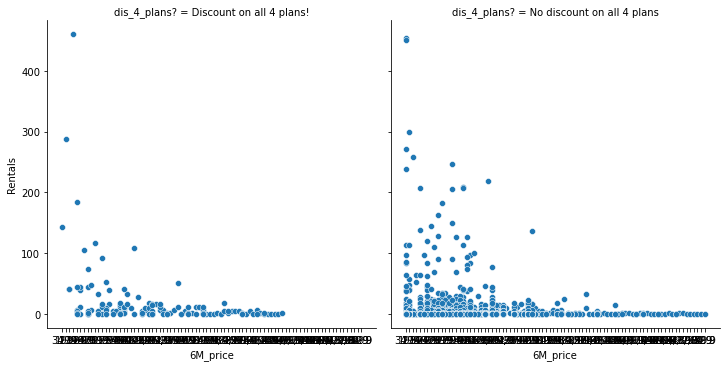

In [81]:
sns.relplot(x="6M_price", y="Rentals", data=df, kind="scatter", col="dis_4_plans?")

C:\Users\Juan Diego\anaconda3\lib\site-packages\matplotlib\colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Juan Diego\anaconda3\lib\site-packages\matplotlib\colors.py:1062: RuntimeWarning: invalid value encountered in true_divide


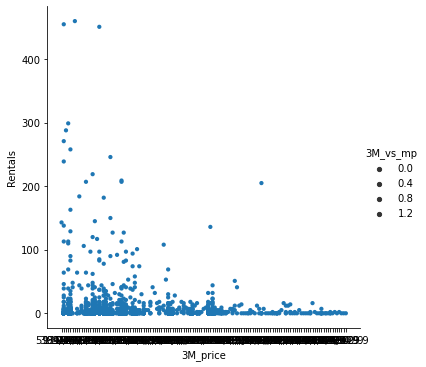

In [84]:
sns.relplot(x="3M_price", y="Rentals", data=df, kind="scatter", size="3M_vs_mp")

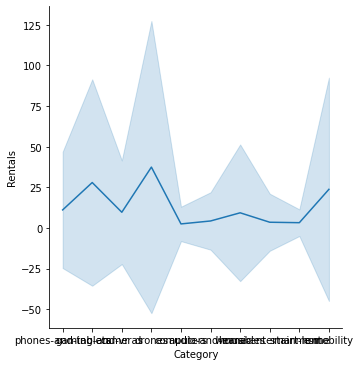

In [85]:
sns.relplot(x="Category", y="Rentals", data=df, kind="line", ci="sd")

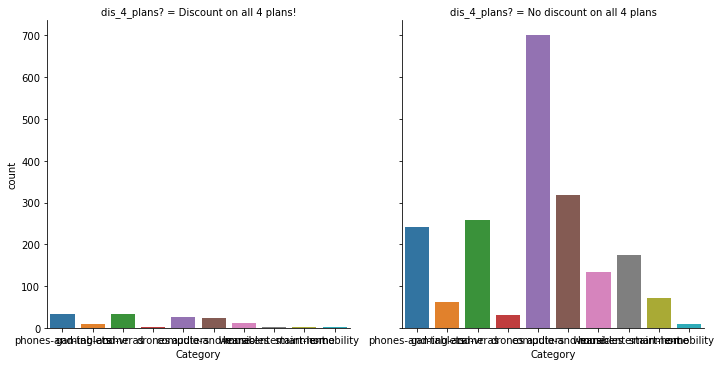

In [86]:
sns.catplot(kind="count", x="Category", data=df, col="dis_4_plans?")

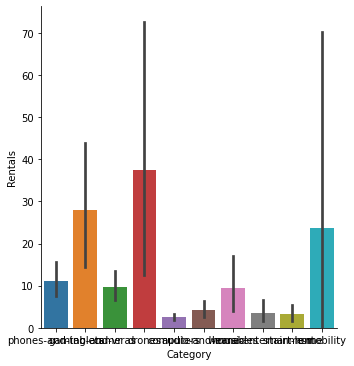

In [87]:
sns.catplot(kind="bar", x="Category", y="Rentals", data=df)

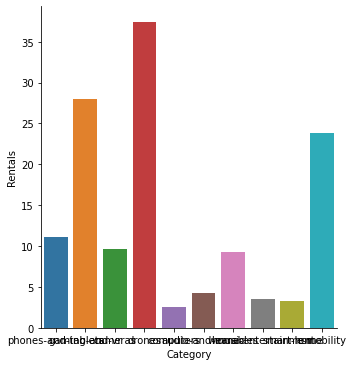

In [88]:
sns.catplot(kind="bar", x="Category", y="Rentals", data=df, ci=None) #you can order with order = ["a", "b"]


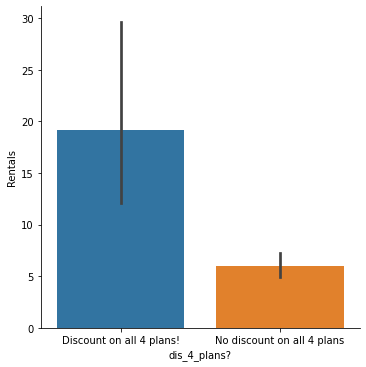

In [89]:
sns.catplot(kind="bar", x="dis_4_plans?", y="Rentals", data=df)

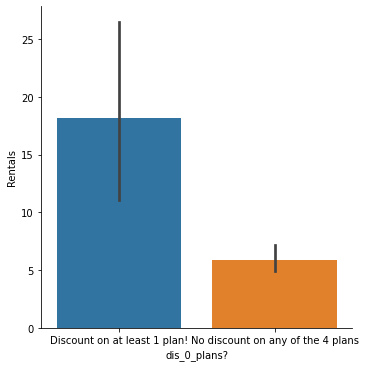

In [90]:
sns.catplot(kind="bar", x="dis_0_plans?", y="Rentals", data=df)

In [91]:
# Now some boxplots

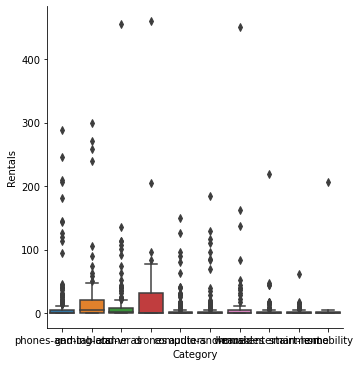

In [92]:
sns.catplot(kind="box", x="Category", y="Rentals", data=df)

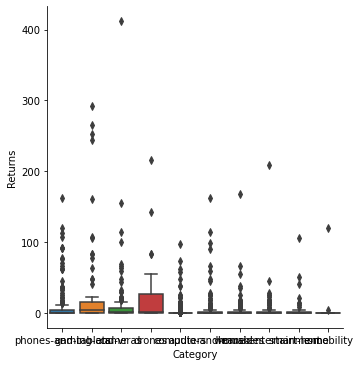

In [93]:
sns.catplot(kind="box", x="Category", y="Returns", data=df)

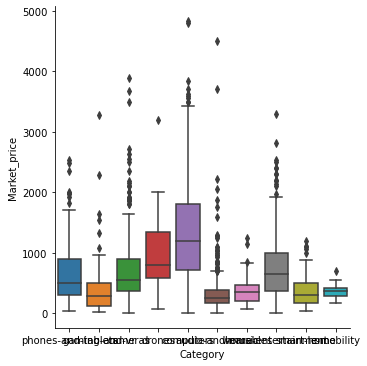

In [94]:
sns.catplot(kind="box", x="Category", y="Market_price", data=df)

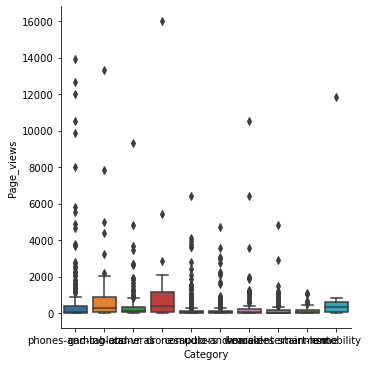

In [95]:
sns.catplot(kind="box", x="Category", y="Page_views", data=df)

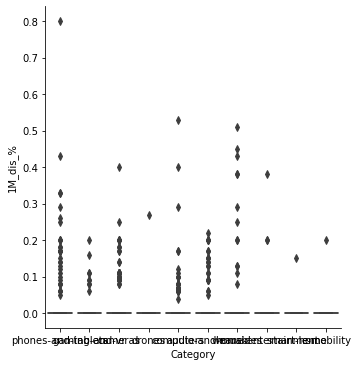

In [96]:
sns.catplot(kind="box", x="Category", y="1M_dis_%", data=df)

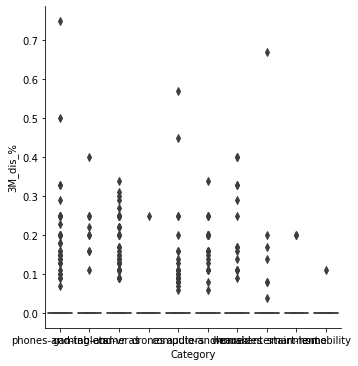

In [97]:
sns.catplot(kind="box", x="Category", y="3M_dis_%", data=df)

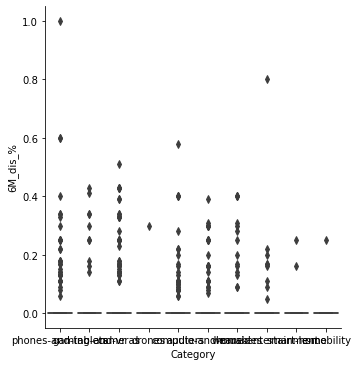

In [98]:
sns.catplot(kind="box", x="Category", y="6M_dis_%", data=df)

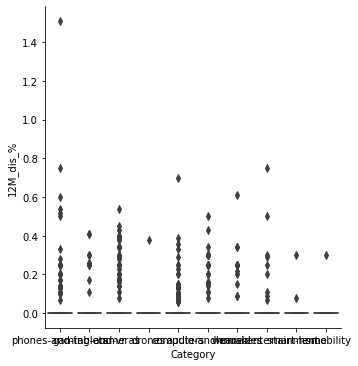

In [99]:
sns.catplot(kind="box", x="Category", y="12M_dis_%", data=df)

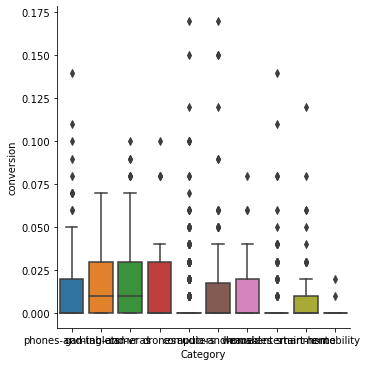

In [100]:
sns.catplot(kind="box", x="Category", y="conversion", data=df)

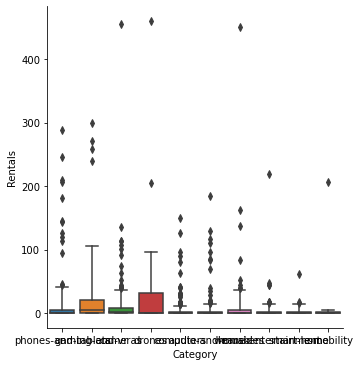

In [101]:
sns.catplot(kind="box", x="Category", y="Rentals", data=df, whis=[5, 95])

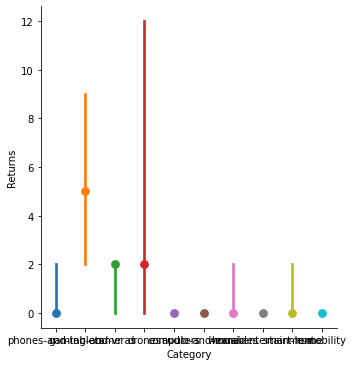

In [102]:
sns.catplot(kind="point", x="Category", y="Returns", data=df, hue="Category", estimator=median)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'phones-and-tablets'),
  Text(1, 0, 'gaming-and-vr'),
  Text(2, 0, 'cameras'),
  Text(3, 0, 'drones'),
  Text(4, 0, 'computers'),
  Text(5, 0, 'audio-and-music'),
  Text(6, 0, 'wearables'),
  Text(7, 0, 'home-entertainment'),
  Text(8, 0, 'smart-home'),
  Text(9, 0, 'e-mobility')])

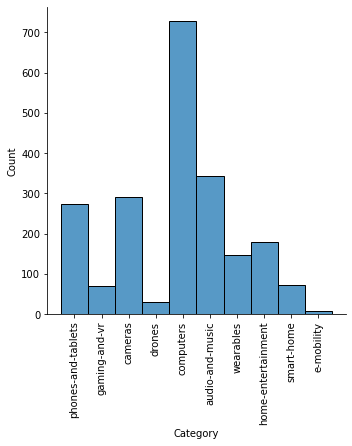

In [105]:
sns.displot(df["Category"])
plt.xticks(rotation=90)

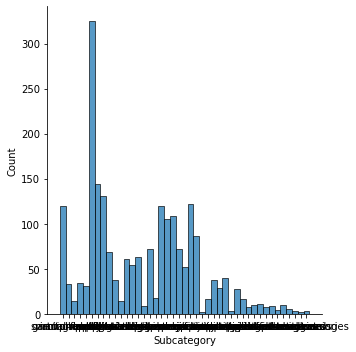

In [107]:
sns.displot(df["Subcategory"])

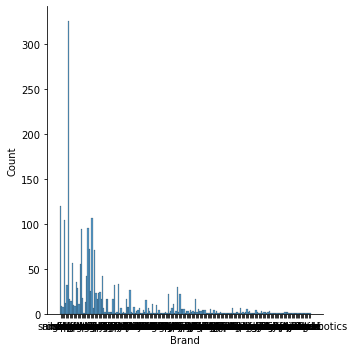

In [108]:
sns.displot(df["Brand"])

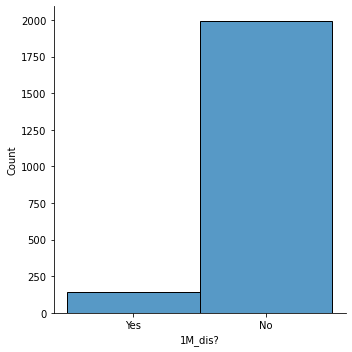

In [109]:
sns.displot(df["1M_dis?"])

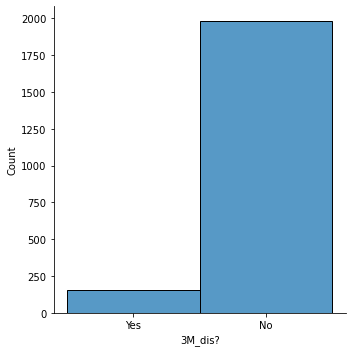

In [110]:
sns.displot(df["3M_dis?"])

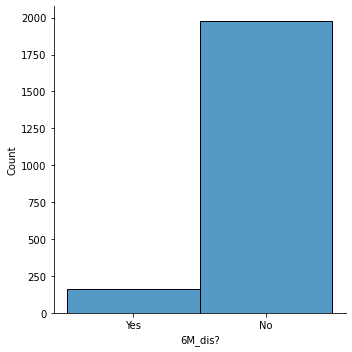

In [111]:
sns.displot(df["6M_dis?"])

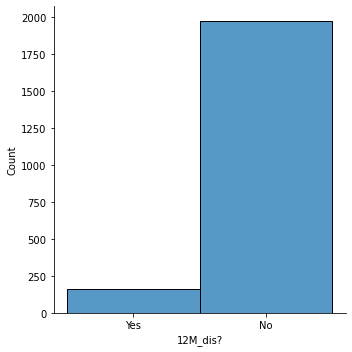

In [112]:
sns.displot(df["12M_dis?"])

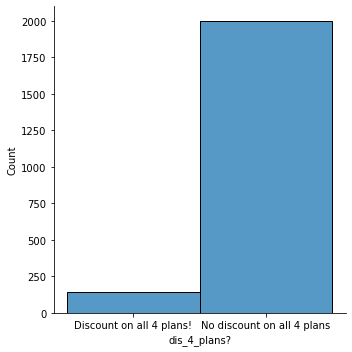

In [113]:
sns.displot(df["dis_4_plans?"])

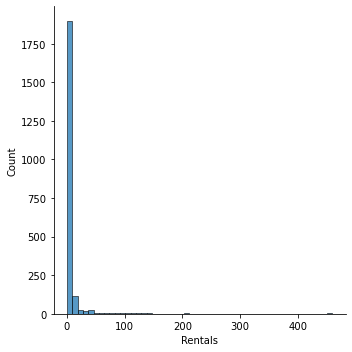

In [114]:
sns.displot(df["Rentals"], bins=50)

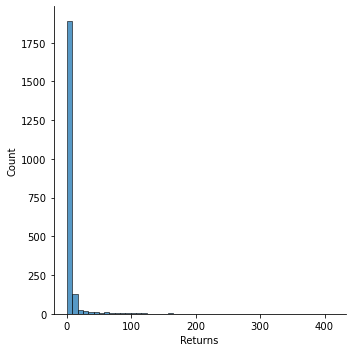

In [115]:
sns.displot(df["Returns"], bins=50)

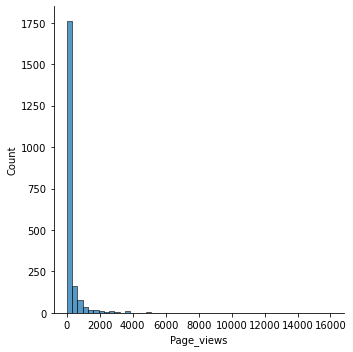

In [116]:
sns.displot(df["Page_views"], bins=50)

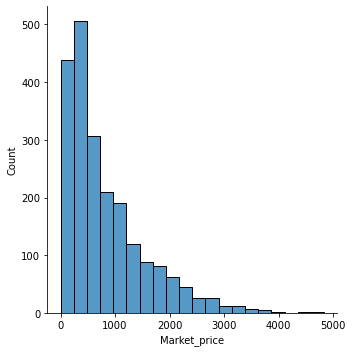

In [117]:
sns.displot(df["Market_price"], bins=20)

<AxesSubplot:xlabel='Market_price', ylabel='Rentals'>

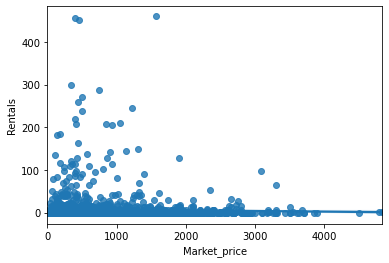

In [118]:
#Regression plots

sns.regplot(data=df, x="Market_price", y="Rentals")

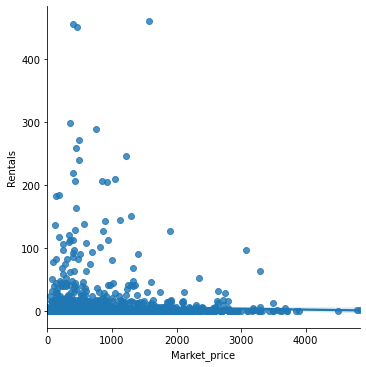

In [119]:
sns.lmplot(data=df, x="Market_price", y="Rentals")

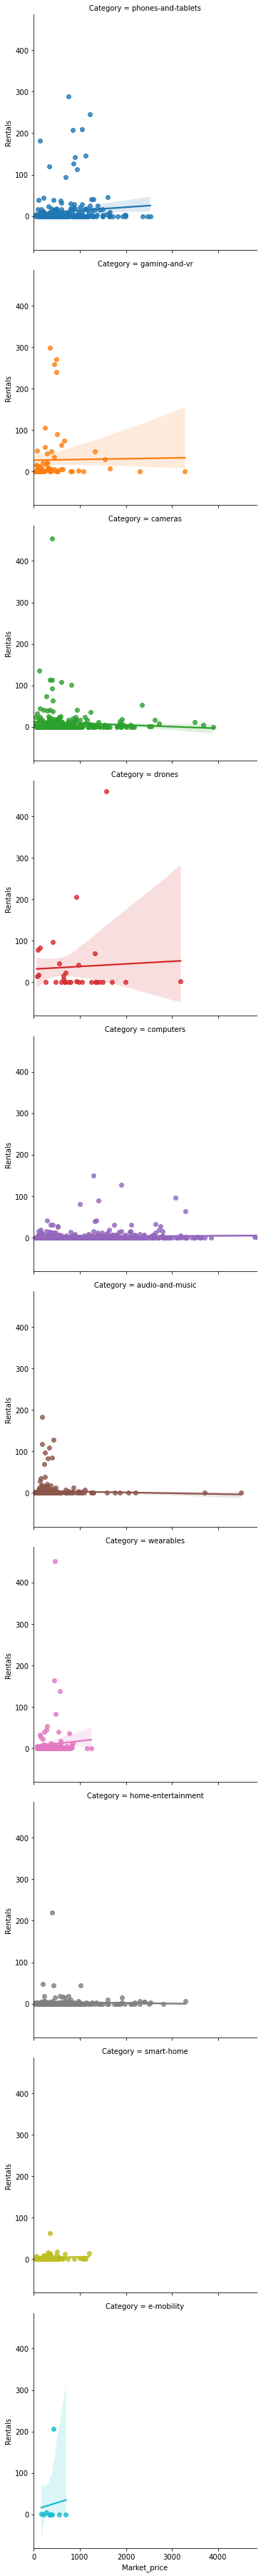

In [120]:
sns.lmplot(data=df, x="Market_price", y="Rentals", hue="Category", row="Category")

In [ ]:
# Now, let's start asking questions that might be relevant and finding
# the answer on python, being with just numbers or visualizations

In [122]:
# How many different items we have in the dataset?
    
total_items = df.shape[0]
total_items

2139

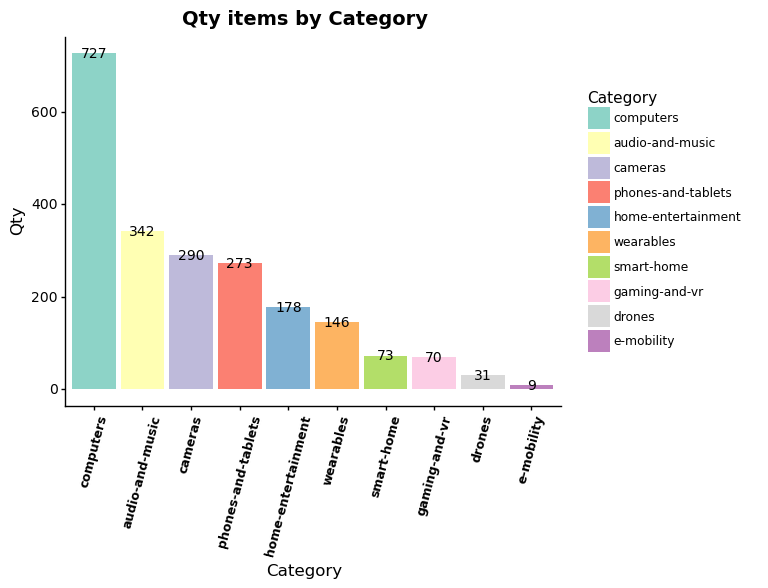

<ggplot: (174765822088)>

In [124]:
# How are these items distributed in terms of Category

by_cat = df.groupby(by=["Category"], as_index=False).Rentals.count().sort_values(by="Rentals", ascending=False)

by_cat["Category"] = pd.Categorical(by_cat.Category, categories =["computers", "audio-and-music", "cameras", \
                                                                  "phones-and-tablets", "home-entertainment", \
                                                                  "wearables", "smart-home", "gaming-and-vr", \
                                                                  "drones", "e-mobility"]) 

ggplot(aes(x="Category", y="Rentals", fill="Category"), by_cat) +\
    geom_bar(stat="identity")\
        + theme_classic() +\
            labs(title = "Qty items by Category", x = "Category", y = "Qty")\
                + theme(axis_text_x=element_text(size=9, weight="bold", color="black", rotation=75), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=14, hjust = 0.5))\
                    + geom_text(aes(label="Rentals"), size=10, color="black")\
                        + scale_fill_brewer(type = "qual", palette = "Set3" )

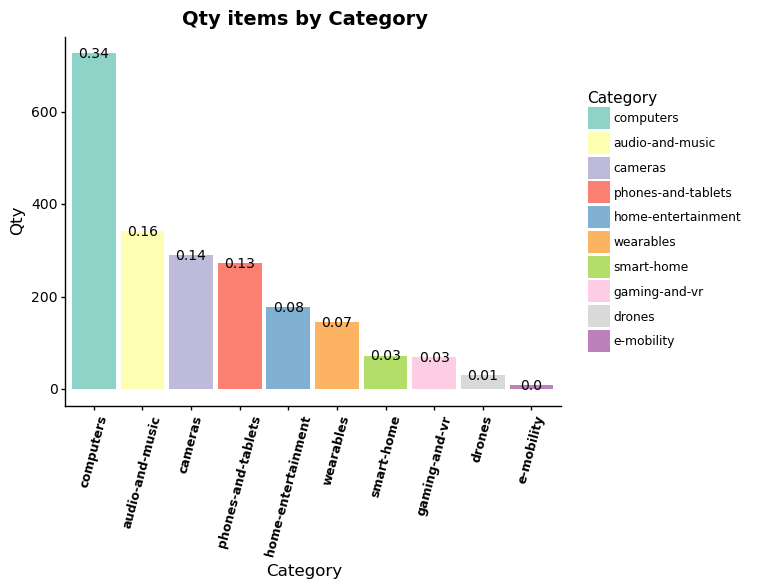

<ggplot: (174765883546)>

In [125]:
by_cat["%_of_total"] = round(by_cat["Rentals"]/total_items, 2)

ggplot(aes(x="Category", y="Rentals", fill="Category"), by_cat) +\
    geom_bar(stat="identity")\
        + theme_classic() +\
            labs(title = "Qty items by Category", x = "Category", y = "Qty")\
                + theme(axis_text_x=element_text(size=9, weight="bold", color="black", rotation=75), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=14, hjust = 0.5))\
                    + geom_text(aes(label="%_of_total"), size=10, color="black")\
                        + scale_fill_brewer(type = "qual", palette = "Set3" )

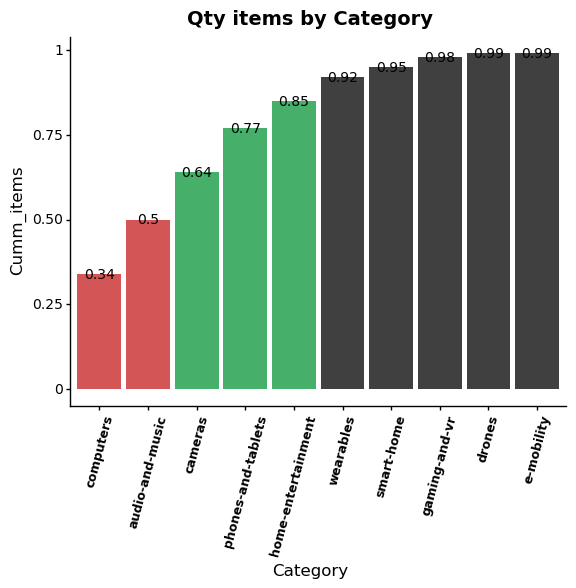

<ggplot: (174765883567)>

In [126]:
by_cat["cumm_%"] = round(np.cumsum(by_cat["%_of_total"]), 2)

ggplot(aes(x="Category", y="cumm_%", fill="Category"), by_cat) +\
    geom_bar(stat="identity", fill=["#d45555" if p <= 0.5 else "#46b06a" if  p <=0.86 else "#404040" for p in list(by_cat["cumm_%"])])\
        + theme_classic() +\
            labs(title = "Qty items by Category", x = "Category", y = "Cumm_items")\
                + theme(axis_text_x=element_text(size=9, weight="bold", color="black", rotation=75), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=14, hjust = 0.5))\
                    + geom_text(aes(label="cumm_%"), size=10, color="black")

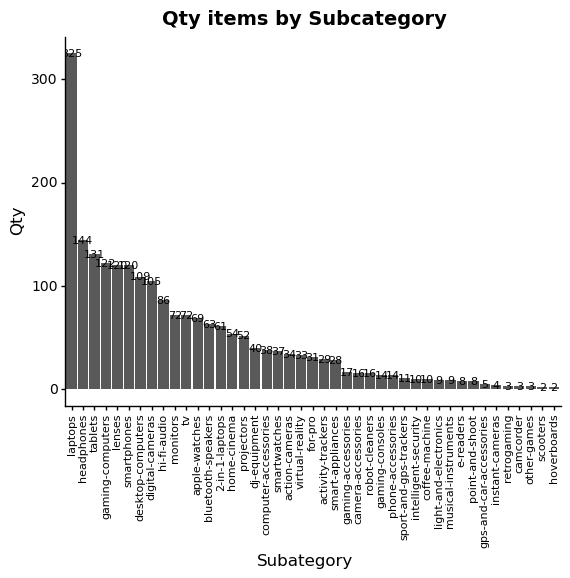

<ggplot: (174765825244)>

In [127]:
# In terms of subcategory
        
by_subcat = df.groupby(by=["Subcategory"], as_index=False).Rentals.count().sort_values(by="Rentals", ascending=False)

sublist = list(df.groupby(by=["Subcategory"]).Rentals.count().sort_values(ascending=False).index)

by_subcat["Subcategory"] = pd.Categorical(by_subcat.Subcategory, categories = sublist)

ggplot(aes(x="Subcategory", y="Rentals"), by_subcat) +\
    geom_bar(stat="identity")\
        + theme_classic() +\
            labs(title = "Qty items by Subcategory", x = "Subategory", y = "Qty")\
                + theme(axis_text_x=element_text(size=8, color="black", rotation=90), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=14, hjust = 0.5))\
                    + geom_text(aes(label="Rentals"), size=8, color="black")

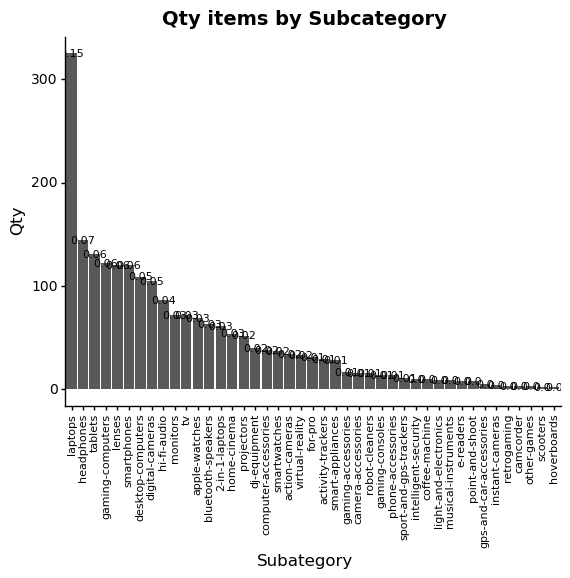

<ggplot: (174766144368)>

In [128]:
by_subcat["%_of_total"] = round(by_subcat["Rentals"]/total_items, 2)

ggplot(aes(x="Subcategory", y="Rentals"), by_subcat) +\
    geom_bar(stat="identity")\
        + theme_classic() +\
            labs(title = "Qty items by Subcategory", x = "Subategory", y = "Qty")\
                + theme(axis_text_x=element_text(size=8, color="black", rotation=90), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=14, hjust = 0.5))\
                    + geom_text(aes(label="%_of_total"), size=8, color="black")

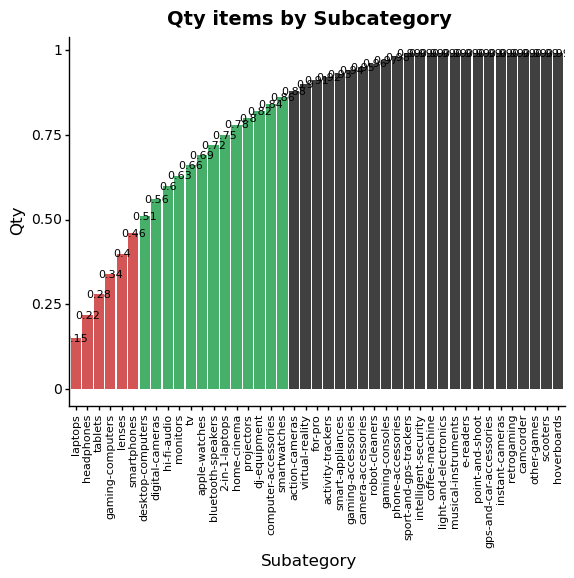

<ggplot: (174766155490)>

In [129]:
by_subcat["cumm_%"] = round(np.cumsum(by_subcat["%_of_total"]), 2)

ggplot(aes(x="Subcategory", y="cumm_%"), by_subcat) +\
    geom_bar(stat="identity", fill=["#d45555" if p <= 0.5 else "#46b06a" if  p <=0.86 else "#404040" for p in list(by_subcat["cumm_%"])])\
        + theme_classic() +\
            labs(title = "Qty items by Subcategory", x = "Subategory", y = "Qty")\
                + theme(axis_text_x=element_text(size=8, color="black", rotation=90), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=14, hjust = 0.5))\
                    + geom_text(aes(label="cumm_%"), size=8, color="black")

In [ ]:
# You have 43 subcats. With 3 of them you reach 25% of your different products, with 7 50% of your different products. 
# This means that the assortment is quite unbalanced.

In [130]:
# How many different brands we have?
        
df.Brand.nunique() #191 different brands for 2139 different items

191

In [131]:
# Amount of items per brand
        
by_brand = df.groupby(by=["Brand"], as_index=False).Rentals.count().sort_values(by="Rentals", ascending=False)
by_brand.head()

,Brand,Rentals
43,apple,326
153,samsung,120
44,asus,107
166,sony,104
34,acer,96


In [132]:
# Let's see % of total and distribution

by_brand["%_of_total"] = round(by_brand["Rentals"]/total_items, 4)
by_brand["cumm_%"] = round(np.cumsum(by_brand["%_of_total"]), 2)

# You have 191 different brands, and 2139 items. With just the 3 top brands (in terms
# of number of items) you get 26% of all items, and with your top 10 brands (just 5% of 
# total brands) you get 50% of your different items.

<ipython-input-133-b7751205793c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


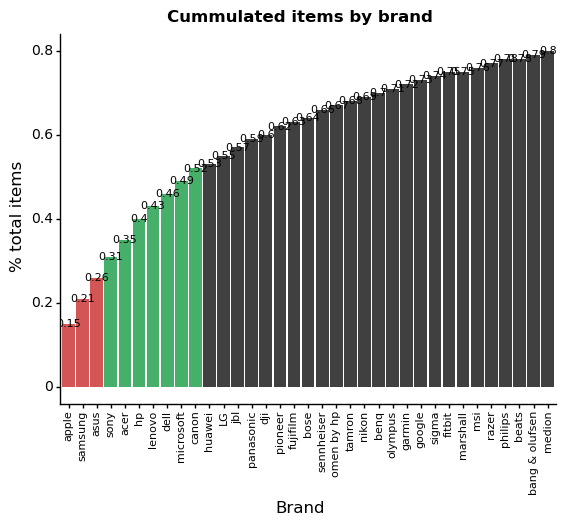

<ggplot: (174765879149)>

In [133]:
 # Let's give brands a ranking based on total number of items
        
by_brand["items_ranking"] = [i+1 for i in range(191)]

by_brand_top = by_brand.loc[by_brand["items_ranking"] <= 35, :]

sublist2 = list(by_brand_top["Brand"])

by_brand_top["Brand"] = pd.Categorical(by_brand_top.Brand, categories = sublist2)

ggplot(aes(x="Brand", y="cumm_%"), by_brand_top) +\
    geom_bar(stat="identity", fill=["#d45555" if p <= 3 else "#46b06a" if  p <=10 else "#404040" for p in list(by_brand_top.items_ranking)])\
        + theme_classic() +\
            labs(title = "Cummulated items by brand", x = "Brand", y = "% total items")\
                + theme(axis_text_x=element_text(size=8, color="black", rotation=90), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=12, hjust = 0.5))\
                    + geom_text(aes(label="cumm_%"), size=8, color="black")

In [134]:
# Let's analyze rentals now

# How many rentals in the period 
        
total_rentals = df["Rentals"].sum()
avg_rentals = df["Rentals"].mean()
max_rentals = df["Rentals"].max()
min_rentals = df["Rentals"].min()

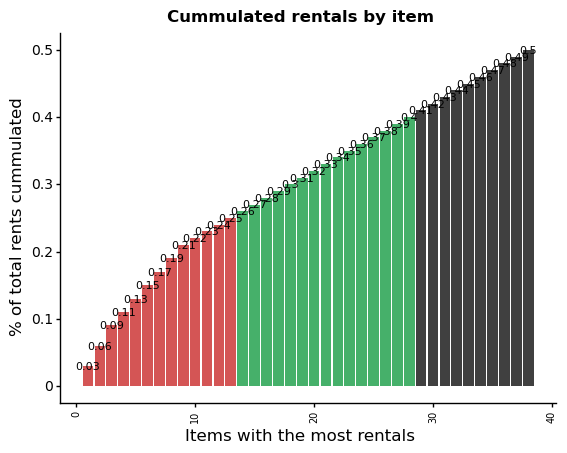

<ggplot: (174766168414)>

In [135]:
#Top items with the most rentals
        
df_rentals = df.sort_values(by="Rentals", ascending=False)
df_rentals["%_of_total"] = round(df_rentals["Rentals"]/total_rentals, 2)
df_rentals["cumm_%"] = round(np.cumsum(df_rentals["%_of_total"]), 2)
df_rentals = df_rentals.loc[df_rentals["cumm_%"] <= 0.5, :]
df_rentals["rental_ranking"] = [i+1 for i in range(38)]

ggplot(aes(x="rental_ranking", y="cumm_%"), df_rentals) +\
    geom_bar(stat="identity", fill=["#d45555" if p <= 0.25 else "#46b06a" if  p <=0.4 else "#404040" for p in list(df_rentals["cumm_%"])])\
        + theme_classic() +\
            labs(title = "Cummulated rentals by item", x = "Items with the most rentals", y = "% of total rents cummulated")\
                + theme(axis_text_x=element_text(size=7, color="black", rotation=90), axis_text_y=element_text(size=10, color="black") \
                        ,axis_title=element_text(size=12),\
                        plot_title=element_text(weight='bold', size=12, hjust = 0.5))\
                    + geom_text(aes(label="cumm_%"), size=8, color="black")

In [136]:
# There are 2139 items. If we sorted them from the ones with the most rentals to the ones 
# with the least rentals and sort them: 9 items are 20% of all rentals,
# 13 items cummulate 25% of all rentals in the period, and 38 items cummulate 50% of all rentals
# This means that the first 38 items represent 50% of rentals, while the other 2101 items cummulate the other 50%.

In [ ]:
# How many items with 0 rentals? And with less than 10, 20?

In [137]:
df_worst = df.loc[df["Rentals"] <= 20, :]

df_worst["low_rental"] = pd.cut(df_worst.Rentals, bins=[-100, 0, 1, 5, 10, np.inf], labels = ["Zero", "Unused", "Between 1 and 5", "Between 5 and 10", "Between 10 and 20"])

df_worst.value_counts("low_rental")

<ipython-input-137-6096b4efefac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


low_rental
Zero                 1358
Between 1 and 5       414
Between 5 and 10      125
Between 10 and 20     113
Unused                  0
dtype: int64

In [138]:
# Out of the the 2139 items we have, 2010 have had 20 or less rentals (so only 129 have more than 20 rentals in the period):
        # 1358 (63% of total items!) have had 0 rentals in the period.
        # 414 (19% of total items) had between 1 and 5 rentals
        # 125 (6% of total items) had between 5 and 10 rentals
        # 113 (5% of total items) had between 10 and 20 rentals

In [139]:
# Items with the best and worst rental-return ratio?
        
df["rent_vs_rtrn"].mean() #average was 0.64, which means rentals were 0.64 of returns, on average
df["rent_vs_rtrn"].min()
df["rent_vs_rtrn"].max() #max was 19.5, which means there was an item that was rented 19 times more than returned. (38 rentals, 2 returns)

19.5

In [140]:
df_ratio = df.sort_values(by="rent_vs_rtrn", ascending = False)
df_ratio["rr_ratio"] = pd.cut(df_ratio.rent_vs_rtrn, bins=[-100, 0, 1, 2, 5, 10, np.inf], labels = ["Zero", "btwn 0-1", "btwn 1 and 2", "btwn 2 and 5", "btwn 5 and 10", "More than 10"])
top100_ratio = df_ratio.loc[:, ["Ranking", "Category", "Subcategory", "Brand", "Rentals", "Returns", "rent_vs_rtrn", "Page_views", "Market_price", "12M_vs_mp"]].head(100)

In [141]:
df_ratio.value_counts("rr_ratio")

rr_ratio
Zero             1358
btwn 1 and 2      389
btwn 0-1          267
btwn 2 and 5      108
btwn 5 and 10      13
More than 10        4
dtype: int64

In [142]:
  # Out of the 2139 items, I made a rental-return ratio. I classified it, results:
        # 1358 (63%) items have a ratio of 0, because of 0 rentals.
        # 267 (18%) items have a ratio between 0 and 1, which means items with more returns than rentals 
        # 389 (12%) items have a ratio between 1 and 2, which means items with almost x2 more rentals than returns
        # 108 (5%) items have a ratio between 2 and 5, which means items with almost x5 more rentals than returns
        # 13 (0.6%) items have a ratio between 5 and 10
        # 4 (0.2%) items have a ratio bigger than 10

In [143]:
# Rental-return ratio by category, subcategory, brand
    
rr_cat = df_ratio.groupby(by="Category", as_index=False).rent_vs_rtrn.mean().sort_values(by="rent_vs_rtrn", ascending=False)
rr_subcat = df_ratio.groupby(by="Subcategory", as_index=False).rent_vs_rtrn.mean().sort_values(by="rent_vs_rtrn", ascending=False)
rr_brand = df_ratio.groupby(by="Brand", as_index=False).rent_vs_rtrn.mean().sort_values(by="rent_vs_rtrn", ascending=False).head(20)

In [144]:
# For the top 100 products with the better rr_ratio, how do they look by cat, subcat, brand?
    
top100_ratio.groupby(by="Category", as_index=False).rent_vs_rtrn.mean().sort_values(by="rent_vs_rtrn", ascending=False)
top100_ratio.groupby(by="Subcategory", as_index=False).rent_vs_rtrn.mean().sort_values(by="rent_vs_rtrn", ascending=False)
top100_ratio.groupby(by="Brand", as_index=False).rent_vs_rtrn.mean().sort_values(by="rent_vs_rtrn", ascending=False)

,Brand,rent_vs_rtrn
24,msi,19.500000
17,gopro,8.200000
5,asus,7.000000
8,brother,6.000000
30,samsung,5.356923
2,acer,5.322500
19,jabra,4.500000
12,ecovacs,4.500000
0,4MOMS,4.500000
13,fitbit,4.450000


In [145]:
 # Let's take a look at rentals by Cat, Subcat, Brand, dis_0_plans
    
df.groupby(by="Category", as_index=False).Rentals.sum().sort_values(by="Rentals", ascending=False)
df.groupby(by="Subcategory", as_index=False).Rentals.sum().sort_values(by="Rentals", ascending=False)
df.groupby(by="Brand", as_index=False).Rentals.sum().sort_values(by="Rentals", ascending=False)
df.groupby(by="dis_0_plans?", as_index=False).Rentals.sum().sort_values(by="Rentals", ascending=False)

,dis_0_plans?,Rentals
1,No discount on any of the 4 plans,11695
0,Discount on at least 1 plan!,2980


In [146]:
 # Let's look at rentals by price ratio between renting for 12 months and buying it

df_vs_market = df.loc[~df["12M_vs_mp"].isin([0, np.inf]), :]
df_vs_market["12M_vs_mp"].describe()
df_vs_market["Price_class"] = pd.cut(df_vs_market["12M_vs_mp"], bins=[0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, np.inf], labels = ["<0.3 of mp", "btwn 0.3-0.5 of mp", "btwn 0.5-0.7 of mp", "btwn 0.7-0.9 of mp", "btwn 0.9-1 of mp", "btwn 1-1.5 of mp", "more than double"])
df_vs_market["Price_class"] = pd.Categorical(df_vs_market["Price_class"], categories = ["<0.3 of mp", "btwn 0.3-0.5 of mp", "btwn 0.5-0.7 of mp", "btwn 0.7-0.9 of mp", "btwn 0.9-1 of mp", "btwn 1-1.5 of mp", "more than double"])
df_2 = df_vs_market.groupby(by="Price_class", as_index=False).Rentals.sum().sort_values(by="Rentals", ascending=False)
df_2["% of total"] = round(df_2["Rentals"]/total_rentals, 2)
print(df_2)

          Price_class  Rentals  % of total
2  btwn 0.5-0.7 of mp     6059        0.41
1  btwn 0.3-0.5 of mp     5689        0.39
3  btwn 0.7-0.9 of mp     1536        0.10
4    btwn 0.9-1 of mp      757        0.05
0          <0.3 of mp      531        0.04
5    btwn 1-1.5 of mp       41        0.00
6    more than double       29        0.00


<ipython-input-146-9949fe0c2160>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-146-9949fe0c2160>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [147]:
# What about sum of rentals for market price buckets?
    
df.Market_price.describe()

df_3 = df.loc[~df["Market_price"].isin([0]), :]
df_3["Price_bucket"] = pd.cut(df_3.Market_price, bins=[0, 100, 200, 300, 500, 750, 1000, 1500, 2000, np.inf], labels = ["<100", "btwn 100-200", "btwn 200-300", "btwn 300-500", "btwn 500-750", "btwn 750-1000", "btwn 1000-1500", "btwn 1500-2000", "More than 2000"])

df_3=df_3.groupby(by="Price_bucket", as_index=False).Rentals.sum().sort_values(by="Rentals", ascending=False)
df_3["% of total"] = round(df_3["Rentals"]/total_rentals, 2)
print(df_3)

     Price_bucket  Rentals  % of total
3    btwn 300-500     5007        0.34
6  btwn 1000-1500     1686        0.11
4    btwn 500-750     1629        0.11
5   btwn 750-1000     1620        0.11
1    btwn 100-200     1533        0.10
2    btwn 200-300     1327        0.09
7  btwn 1500-2000      976        0.07
8  More than 2000      567        0.04
0            <100      323        0.02


<ipython-input-147-2999599bf9c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [148]:
# Now let's look at the returns figures. Start with returns by item

total_returns = df["Returns"].sum()
top_returned = df.sort_values(by="Returns", ascending=False).head(50).loc[:, ["Ranking", "Category", "Subcategory", "Brand", "Rentals", "Returns", "rent_vs_rtrn", "Page_views", "Market_price", "12M_vs_mp"]]
top_returned["%_oftotal"] = round(top_returned["Returns"]/total_returns, 2)
top_returned["cumm_%"] = round(np.cumsum(top_returned["%_oftotal"]), 2)
top_returned["return_ranking"] = [i+1 for i in range(50)]

In [149]:
# If you analyze the items with most returns, and sort the top 50, with just 
# 10 items you get 20% of all total returns, with 40 you get 50% of total returns.

In [150]:
# For the top 50 most returned items, what is their category? Subcat? Brand?
    
top_returned.groupby(by="Category", as_index=False).Returns.sum().sort_values(by="Returns", ascending=False)
top_returned.groupby(by="Subcategory", as_index=False).Returns.sum().sort_values(by="Returns", ascending=False)
top_returned.groupby(by="Brand", as_index=False).Returns.sum().sort_values(by="Returns", ascending=False)

,Brand,Returns
1,apple,1707
12,oculus,865
14,sony,672
3,dji,626
6,gopro,527
11,nintendo,244
5,fujifilm,220
0,acer,209
13,samsung,205
9,jbl,127


In [151]:
top_returned["Price_class"] = pd.cut(top_returned["12M_vs_mp"], bins=[0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, np.inf], labels = ["<0.3 of mp", "btwn 0.3-0.5 of mp", "btwn 0.5-0.7 of mp", "btwn 0.7-0.9 of mp", "btwn 0.9-1 of mp", "btwn 1-1.5 of mp", "more than double"])
top_returned["Price_bucket"] = pd.cut(top_returned.Market_price, bins=[0, 100, 200, 300, 500, 750, 1000, 1500, 2000, np.inf], labels = ["<100", "btwn 100-200", "btwn 200-300", "btwn 300-500", "btwn 500-750", "btwn 750-1000", "btwn 1000-1500", "btwn 1500-2000", "More than 2000"])

top_returned.groupby(by="Price_class", as_index=False).Returns.sum().sort_values(by="Returns", ascending=False)
top_returned.groupby(by="Price_bucket", as_index=False).Returns.sum().sort_values(by="Returns", ascending=False)

,Price_bucket,Returns
3,btwn 300-500,2969
5,btwn 750-1000,779
1,btwn 100-200,576
6,btwn 1000-1500,481
4,btwn 500-750,444
2,btwn 200-300,375
7,btwn 1500-2000,216
0,<100,161
8,More than 2000,0


In [153]:
# Now let's look at Page views. Let's figure out total page views
    
total_views = df.Page_views.sum()
total_views

668799

In [156]:
 # Now let's build the dataframe, and start by looking at % of total views
    
viewed = df.sort_values(by="Page_views", ascending=False).loc[:, ["Ranking", "Category", "Subcategory", "Brand", "Rentals", "Returns", "rent_vs_rtrn", "Page_views", "Market_price", "12M_vs_mp", "conversion"]]
viewed["%_of_total"] = viewed["Page_views"]/total_views
viewed["cumm_%"] = np.cumsum(viewed["%_of_total"])
viewed["views_ranking"] = [i+1 for i in range(2139)]
viewed.head(12)

,Ranking,Category,Subcategory,Brand,Rentals,Returns,rent_vs_rtrn,Page_views,Market_price,12M_vs_mp,conversion,%_of_total,cumm_%,views_ranking
8,9,drones,for-pro,dji,460,216,2.13,16003,1567.0,0.841608,0.03,0.023928,0.023928,1
0,1,phones-and-tablets,smartphones,samsung,143,67,2.13,13902,899.0,0.799555,0.01,0.020787,0.044714,2
5,6,gaming-and-vr,gaming-consoles,sony,258,253,1.02,13338,439.0,0.625968,0.02,0.019943,0.064658,3
67,68,phones-and-tablets,smartphones,apple,246,92,2.67,12659,1218.0,0.688670,0.02,0.018928,0.083586,4
2,3,phones-and-tablets,smartphones,samsung,288,32,9.00,12022,749.0,0.799466,0.02,0.017976,0.101561,5
118,119,e-mobility,scooters,xiaomi,207,120,1.72,11832,421.0,0.709739,0.02,0.017691,0.119253,6
104,105,phones-and-tablets,smartphones,apple,113,108,1.05,10549,936.0,0.639744,0.01,0.015773,0.135026,7
22,23,wearables,apple-watches,apple,451,168,2.68,10518,464.0,0.721552,0.04,0.015727,0.150752,8
38,39,phones-and-tablets,smartphones,apple,207,92,2.25,9894,849.0,0.705300,0.02,0.014794,0.165546,9
7,8,cameras,action-cameras,gopro,455,412,1.10,9325,394.0,0.910660,0.05,0.013943,0.179489,10


In [ ]:
# The 12 most viewed products make up 20% of all views, and the top 76
# make up 50% of all views. This means that the other 2036 make up the other 50%

In [157]:
# Let's analyze page views(all of them) by Category, Subcategory, Brand

df3 = viewed.groupby(by="Category", as_index=False).Page_views.sum().sort_values(by="Page_views", ascending=False)
df3["%_of_total"] = df3["Page_views"]/total_views
print(df3)

             Category  Page_views  %_of_total
7  phones-and-tablets      177050    0.264728
2           computers      116636    0.174396
1             cameras      101012    0.151035
5       gaming-and-vr       65072    0.097297
0     audio-and-music       58398    0.087318
9           wearables       50883    0.076081
3              drones       39975    0.059771
6  home-entertainment       32999    0.049341
4          e-mobility       14360    0.021471
8          smart-home       12414    0.018562


In [158]:
df4 = viewed.groupby(by="Subcategory", as_index=False).Page_views.sum().sort_values(by="Page_views", ascending=False)
df4["%_of_total"] = df4["Page_views"]/total_views
print(df4)

                Subcategory  Page_views  %_of_total
37              smartphones      136494    0.204088
24                  laptops       56698    0.084776
13                  for-pro       39975    0.059771
10          digital-cameras       38505    0.057573
40                  tablets       36305    0.054284
3             apple-watches       32680    0.048864
16          gaming-consoles       28796    0.043056
18               headphones       27794    0.041558
42          virtual-reality       27046    0.040440
25                   lenses       25448    0.038050
1            action-cameras       23403    0.034993
15         gaming-computers       21631    0.032343
4        bluetooth-speakers       18705    0.027968
41                       tv       13039    0.019496
38             smartwatches       12994    0.019429
27                 monitors       12782    0.019112
35                 scooters       12144    0.018158
32               projectors       11969    0.017896
8      compu

In [159]:
df5 = viewed.groupby(by="Brand", as_index=False).Page_views.sum().sort_values(by="Page_views", ascending=False)
df5["%_of_total"] = df5["Page_views"]/total_views
print(df5)

              Brand  Page_views  %_of_total
43            apple      183773    0.274781
153         samsung       73800    0.110347
166            sony       58399    0.087319
65              dji       44936    0.067189
34             acer       17254    0.025798
..              ...         ...         ...
11             ELAC           2    0.000003
109           miele           2    0.000003
138  porsche design           2    0.000003
50     beyerdynamic           0    0.000000
148            rif6           0    0.000000

[191 rows x 3 columns]


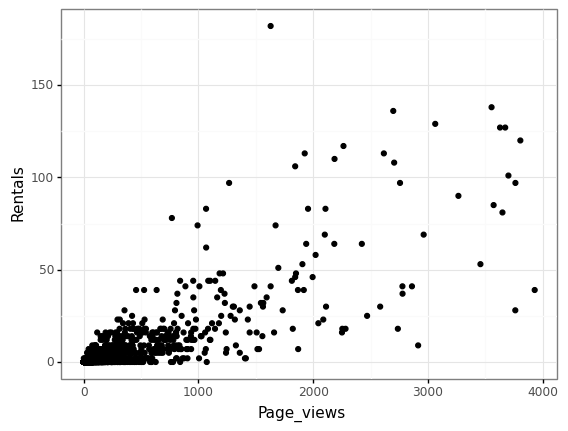

<ggplot: (174763258727)>

In [160]:
# What about conversion now?

ggplot(aes(x="Page_views", y="Rentals"), df.loc[df.Page_views <= 4000, :]) + geom_point() +theme_bw()


In [161]:
avg_conversion = viewed["conversion"].mean()

In [162]:
# How does the average conversion of all items vary against the conversion of the most viewed items (50% views)

top76_conversion = viewed.loc[viewed["views_ranking"] <= 76 , :].conversion.mean()

In [163]:
# Average conversion by cat, subcat, brand, price
    
viewed.groupby(by="Category", as_index=False).conversion.mean().sort_values(by="conversion", ascending=False)
viewed.groupby(by="Subcategory", as_index=False).conversion.mean().sort_values(by="conversion", ascending=False)
viewed.groupby(by="Brand", as_index=False).conversion.mean().sort_values(by="conversion", ascending=False)

viewed["Price_class"] = pd.cut(viewed["12M_vs_mp"], bins=[0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, np.inf], labels = ["<0.3 of mp", "btwn 0.3-0.5 of mp", "btwn 0.5-0.7 of mp", "btwn 0.7-0.9 of mp", "btwn 0.9-1 of mp", "btwn 1-1.5 of mp", "more than double"])
viewed["Price_bucket"] = pd.cut(viewed.Market_price, bins=[0, 100, 200, 300, 500, 750, 1000, 1500, 2000, np.inf], labels = ["<100", "btwn 100-200", "btwn 200-300", "btwn 300-500", "btwn 500-750", "btwn 750-1000", "btwn 1000-1500", "btwn 1500-2000", "More than 2000"])

viewed.groupby(by="Price_class", as_index=False).conversion.mean().sort_values(by="conversion", ascending=False)
viewed.groupby(by="Price_bucket", as_index=False).conversion.mean().sort_values(by="conversion", ascending=False)

,Price_bucket,conversion
0,<100,0.019219
2,btwn 200-300,0.014936
1,btwn 100-200,0.013786
3,btwn 300-500,0.012337
4,btwn 500-750,0.011696
6,btwn 1000-1500,0.006996
5,btwn 750-1000,0.006926
7,btwn 1500-2000,0.006000
8,More than 2000,0.004908


In [164]:
# Finally, let's analzyze Price. Let's start with creating the price buckets, and then counting how many items in each one

df["Price_class"] = pd.cut(df["12M_vs_mp"], bins=[0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, np.inf], labels = ["<0.3 of mp", "btwn 0.3-0.5 of mp", "btwn 0.5-0.7 of mp", "btwn 0.7-0.9 of mp", "btwn 0.9-1 of mp", "btwn 1-1.5 of mp", "more than double"])
df["Price_bucket"] = pd.cut(df.Market_price, bins=[0, 100, 200, 300, 500, 750, 1000, 1500, 2000, np.inf], labels = ["<100", "btwn 100-200", "btwn 200-300", "btwn 300-500", "btwn 500-750", "btwn 750-1000", "btwn 1000-1500", "btwn 1500-2000", "More than 2000"])
df["rr_ratio"] = pd.cut(df.rent_vs_rtrn, bins=[-100, 0, 1, 2, 5, 10, np.inf], labels = ["Zero", "btwn 0-1", "btwn 1 and 2", "btwn 2 and 5", "btwn 5 and 10", "More than 10"])

df6 = df.groupby(by="Price_class", as_index=False).Ranking.count().sort_values(by="Ranking", ascending=False)
df6["%_of_total"] = df6["Ranking"]/total_items
print(df6)


          Price_class  Ranking  %_of_total
2  btwn 0.5-0.7 of mp      873    0.408135
1  btwn 0.3-0.5 of mp      724    0.338476
4    btwn 0.9-1 of mp      207    0.096774
3  btwn 0.7-0.9 of mp      186    0.086957
0          <0.3 of mp       97    0.045348
5    btwn 1-1.5 of mp       23    0.010753
6    more than double       19    0.008883


In [165]:
df7 = df.groupby(by="Price_bucket", as_index=False).Ranking.count().sort_values(by="Ranking", ascending=False)
df7["%_of_total"] = df7["Ranking"]/total_items
print(df7)

     Price_bucket  Ranking  %_of_total
3    btwn 300-500      398    0.186068
4    btwn 500-750      289    0.135110
1    btwn 100-200      280    0.130902
6  btwn 1000-1500      263    0.122955
5   btwn 750-1000      257    0.120150
2    btwn 200-300      235    0.109864
7  btwn 1500-2000      180    0.084151
8  More than 2000      163    0.076204
0            <100       64    0.029921


In [166]:
# Let's start with Avg market price, 1M, 3M, 6M, 12M, 12M_vs_mp for all rows

avg_mkt_price = df["Market_price"].mean()
avg_1M_price = df["1M_price_full"].mean()
avg_3M_price = df["3M_price_full"].mean()
avg_6M_price = df["6M_price_full"].mean()
avg_12M_price = df["12M_price_full"].mean()
avg_price_ratio = df.loc[~df["12M_vs_mp"].isin([0, np.inf])]["12M_vs_mp"].mean()

In [167]:
 # Now, avg price by Category, subcategory, brand y relacion mp con 12m price para mkt price, 1M, 3M, 6M, 12M y 12M_vs_mp
    
    # First, market price
    
df.groupby(by="Category", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False)
df.groupby(by="Subcategory", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False)
df.groupby(by="Brand", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False)
df.groupby(by="Price_class", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False) #very interesting result here!
df.groupby(by="dis_4_plans?", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False)
df.groupby(by="dis_0_plans?", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False)
df.groupby(by="rr_ratio", as_index=False).Market_price.mean().sort_values(by="Market_price", ascending=False)

,rr_ratio,Market_price
4,btwn 5 and 10,1052.307692
0,Zero,854.886156
2,btwn 1 and 2,831.375321
3,btwn 2 and 5,801.398148
5,More than 10,723.250000
1,btwn 0-1,625.187266


In [168]:
 # Now, let's do 1M, 3M, 6M, 12M and 12M_vs_mp with a loop
    
looping = ["1M_price_full", "3M_price_full", "6M_price_full", "12M_price_full", "12M_vs_mp"]

for c in looping:
    print("This is the START of", c, "tables\n")
    print(df.groupby(by="Category", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print(df.groupby(by="Subcategory", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print(df.groupby(by="Brand", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print(df.groupby(by="Price_class", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print(df.groupby(by="dis_4_plans?", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print(df.groupby(by="dis_0_plans?", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print(df.groupby(by="rr_ratio", as_index=False)[c].mean().sort_values(by=c, ascending=False))
    print("This is the END of", c, "tables\n")

This is the START of 1M_price_full tables

             Category  1M_price_full
2           computers     133.480605
3              drones     111.029032
1             cameras      89.524483
7  phones-and-tablets      74.716850
4          e-mobility      64.900000
5       gaming-and-vr      48.900000
0     audio-and-music      45.859357
9           wearables      45.673973
6  home-entertainment      41.970225
8          smart-home      39.046575
                Subcategory  1M_price_full
15         gaming-computers     172.932787
9         desktop-computers     171.459633
0            2-in-1-laptops     163.672131
5                 camcorder     156.566667
10          digital-cameras     129.328571
24                  laptops     127.269231
13                  for-pro     111.029032
35                 scooters      99.900000
11             dj-equipment      86.277500
40                  tablets      81.548855
32               projectors      81.342308
37              smartphones      7

In [169]:
df.loc[~df["12M_vs_mp"].isin([0, np.inf]),:].groupby(by="Category", as_index=False)["12M_vs_mp"].mean().sort_values(by="12M_vs_mp", ascending=False)
df.loc[~df["12M_vs_mp"].isin([0, np.inf]),:].groupby(by="Subcategory", as_index=False)["12M_vs_mp"].mean().sort_values(by="12M_vs_mp", ascending=False)
df.loc[~df["12M_vs_mp"].isin([0, np.inf]),:].groupby(by="Brand", as_index=False)["12M_vs_mp"].mean().sort_values(by="12M_vs_mp", ascending=False)
df.loc[~df["12M_vs_mp"].isin([0, np.inf]),:].groupby(by="Price_class", as_index=False)["12M_vs_mp"].mean().sort_values(by="12M_vs_mp", ascending=False)
df.loc[~df["12M_vs_mp"].isin([0, np.inf]),:].groupby(by="dis_0_plans?", as_index=False)["12M_vs_mp"].mean().sort_values(by="12M_vs_mp", ascending=False)
df.loc[~df["12M_vs_mp"].isin([0, np.inf]),:].groupby(by="rr_ratio", as_index=False)["12M_vs_mp"].mean().sort_values(by="12M_vs_mp", ascending=False)

,rr_ratio,12M_vs_mp
0,Zero,0.791665
1,btwn 0-1,0.773478
2,btwn 1 and 2,0.769719
3,btwn 2 and 5,0.741640
4,btwn 5 and 10,0.711569
5,More than 10,0.513833


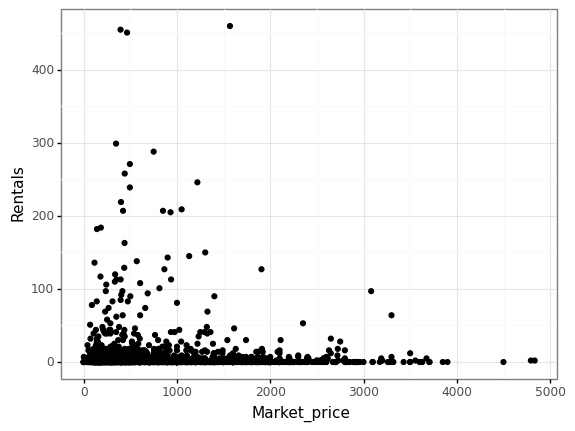

<ggplot: (174763538357)>

In [170]:
# How does price affects rentals?
    
ggplot(aes(x="Market_price", y="Rentals"), df) + geom_point() +theme_bw()

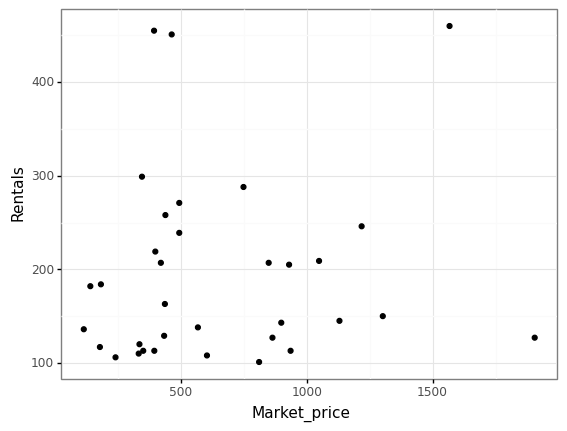

<ggplot: (174765975965)>

In [171]:
# Let's divide into items that had over 100 rentals, and those under less
    
ggplot(aes(x="Market_price", y="Rentals"), df.loc[df.Rentals >= 100, :]) + geom_point() +theme_bw() #for very popular items, price doesnt seem to be so relevant

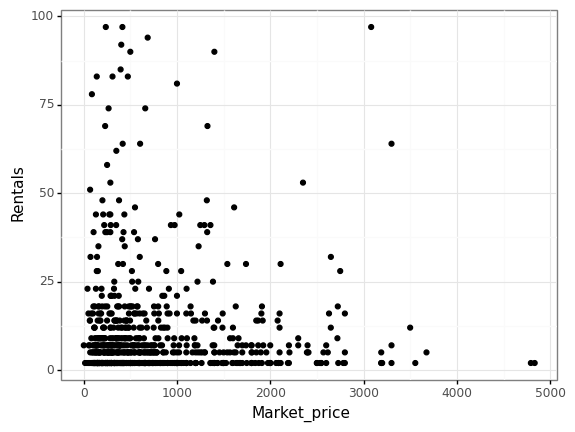

<ggplot: (174760122293)>

In [172]:
ggplot(aes(x="Market_price", y="Rentals"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw() #for everyting else, there seems to be a weak connection

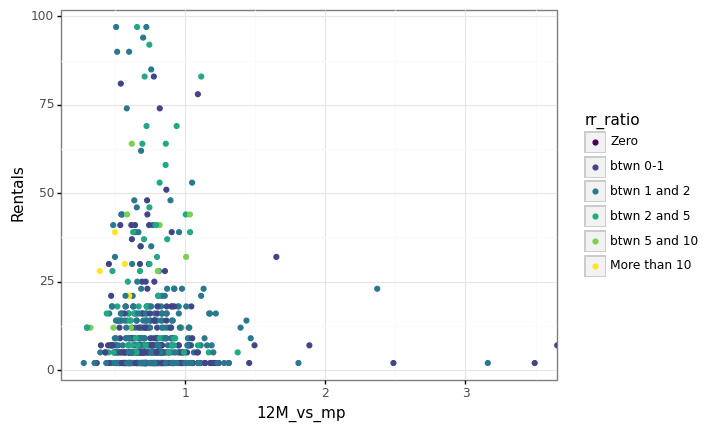

<ggplot: (174768194777)>

In [173]:
# Let's look at how the other prices (and ratio) are related to the rentals

ggplot(aes(x="1M_price_full", y="Rentals"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw() #you can see it here as well
ggplot(aes(x="3M_price_full", y="Rentals"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw() #you can see it here as well
ggplot(aes(x="6M_price_full", y="Rentals"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw() #you can see it here as well
ggplot(aes(x="12M_price_full", y="Rentals"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw() #you can see it here as well
ggplot(aes(x="12M_vs_mp", y="Rentals", color="Price_class"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw() #BINGO, when the 12m_fare is closer to the market price or above it, demand falls rapidly
ggplot(aes(x="12M_vs_mp", y="Rentals",color="rr_ratio"), df.loc[(df.Rentals < 100) & (df.Rentals != 0), :]) + geom_point() +theme_bw()

THIS IS THE GRAPH FOR phones-and-tablets


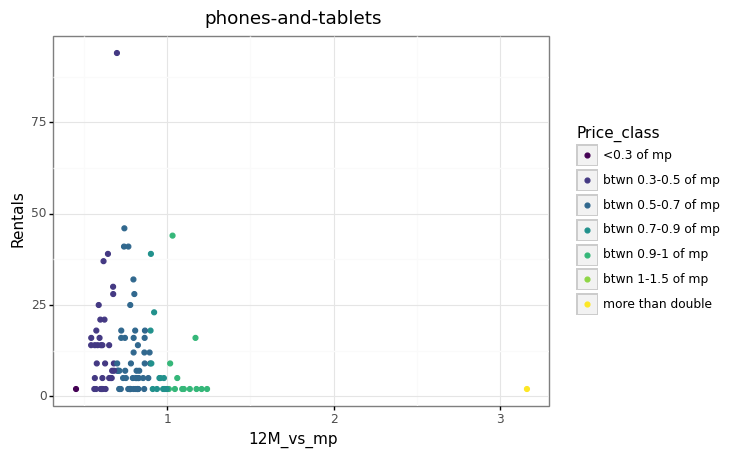


THIS WAS THE LAST GRAPH FOR phones-and-tablets
THIS IS THE GRAPH FOR gaming-and-vr


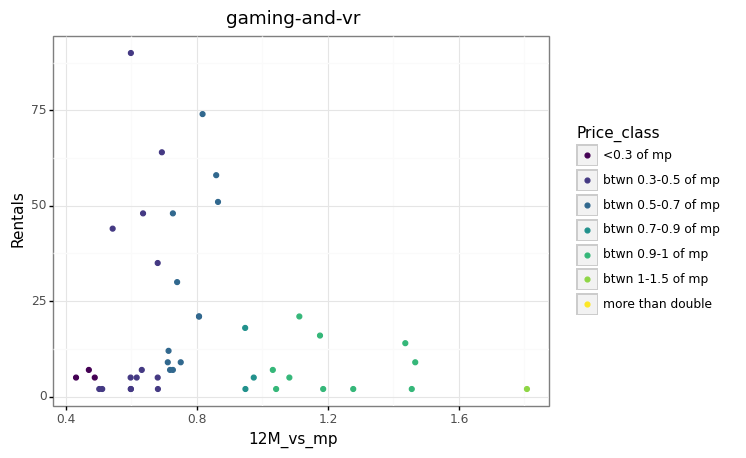


THIS WAS THE LAST GRAPH FOR gaming-and-vr
THIS IS THE GRAPH FOR cameras


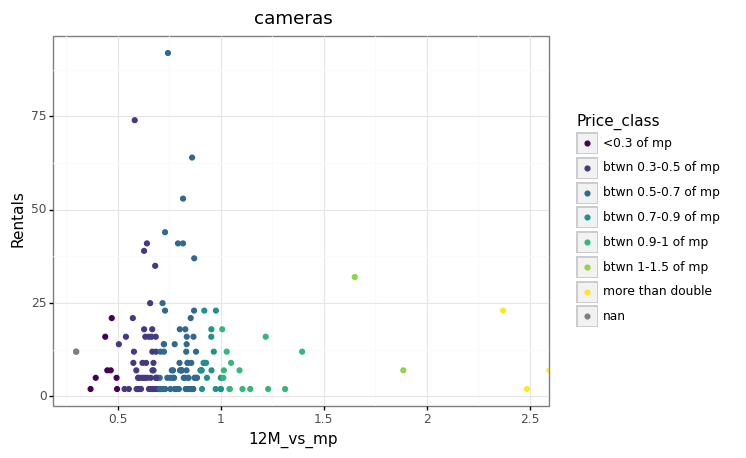


THIS WAS THE LAST GRAPH FOR cameras
THIS IS THE GRAPH FOR drones


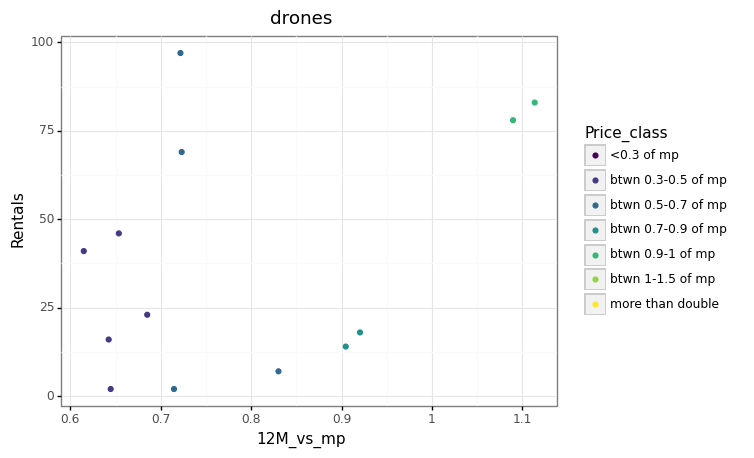


THIS WAS THE LAST GRAPH FOR drones
THIS IS THE GRAPH FOR computers


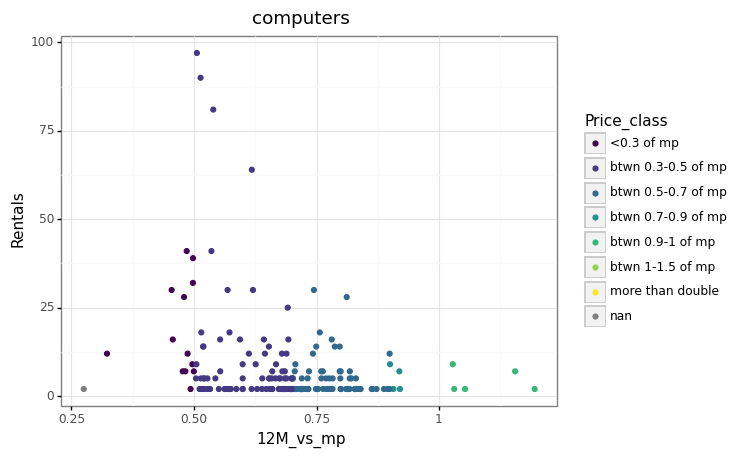


THIS WAS THE LAST GRAPH FOR computers
THIS IS THE GRAPH FOR audio-and-music


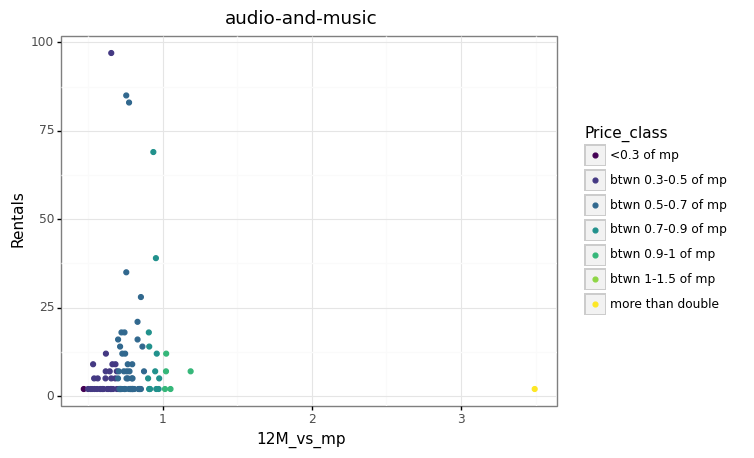


THIS WAS THE LAST GRAPH FOR audio-and-music
THIS IS THE GRAPH FOR wearables


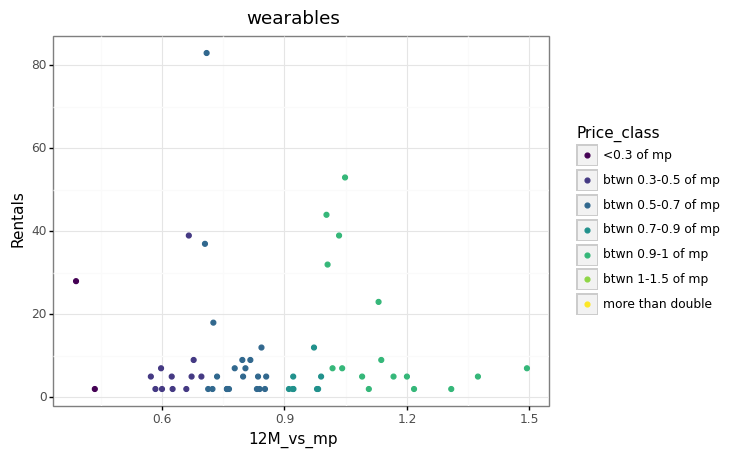


THIS WAS THE LAST GRAPH FOR wearables
THIS IS THE GRAPH FOR home-entertainment


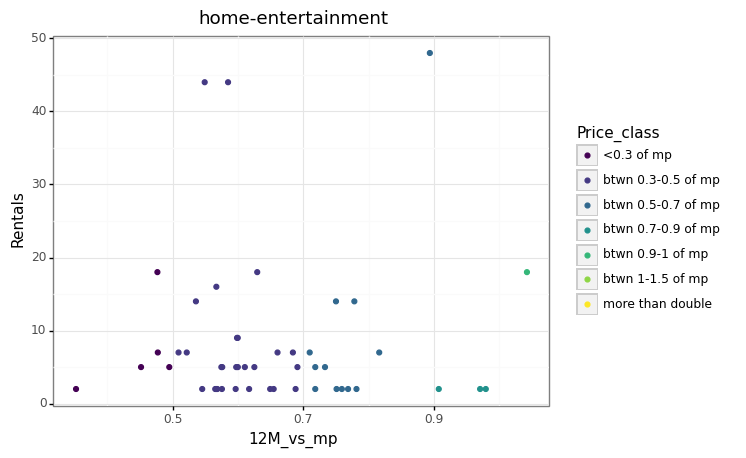


THIS WAS THE LAST GRAPH FOR home-entertainment
THIS IS THE GRAPH FOR smart-home


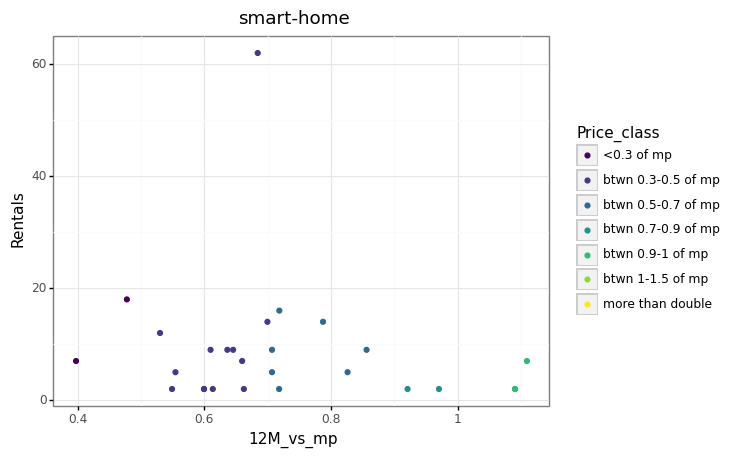


THIS WAS THE LAST GRAPH FOR smart-home
THIS IS THE GRAPH FOR e-mobility


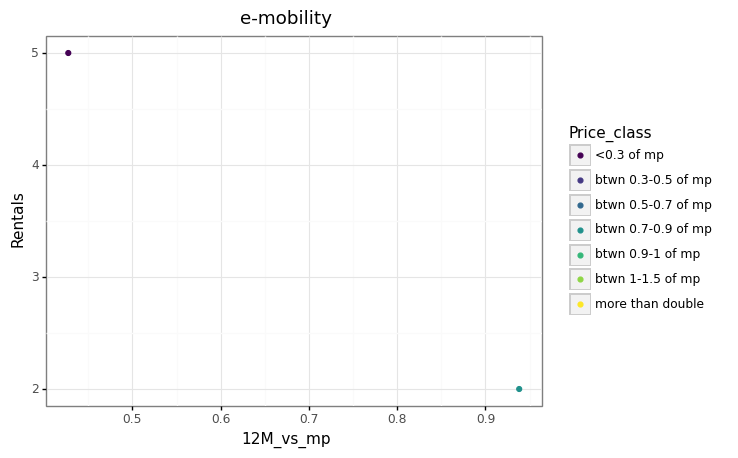


THIS WAS THE LAST GRAPH FOR e-mobility


In [174]:
 # Are there categories that are more and less elastic?

h=list(df["Category"].unique())

for i in h:
    print("THIS IS THE GRAPH FOR", i)
    print(ggplot(aes(x="12M_vs_mp", y="Rentals", color="Price_class"), df.loc[(df.Rentals < 100) & (df.Rentals != 0) & (df.Category == i), :]) + geom_point() +theme_bw() + ggtitle(i))
    print("THIS WAS THE LAST GRAPH FOR", i)

In [ ]:
 # The answer is YES (there are more elastic and less elastic categories) check the graphs above and single out results

In [175]:
# Let's look at average discounts for 1M, 3M, 6M, 12M, for all items WITH DISCOUNT, and by cat, subcat, brand, absolute price
    
avg_1M_dis = df.loc[df["1M_dis_%"] != 0, :]["1M_dis_%"].mean()
avg_3M_dis = df.loc[df["3M_dis_%"] != 0, :]["3M_dis_%"].mean()
avg_6M_dis = df.loc[df["6M_dis_%"] != 0, :]["6M_dis_%"].mean()
avg_12M_dis = df.loc[df["12M_dis_%"] != 0, :]["12M_dis_%"].mean()

In [176]:
 # Now let's look at the avg discounts by cat, subcat, brand, price_bucket & price_class
    
df.loc[df["1M_dis_%"] != 0, :].groupby(by="Category", as_index=False)["1M_dis_%"].mean().sort_values(by=["1M_dis_%"], ascending=False)
df.loc[df["1M_dis_%"] != 0, :].groupby(by="Subcategory", as_index=False)["1M_dis_%"].mean().sort_values(by=["1M_dis_%"], ascending=False)
df.loc[df["1M_dis_%"] != 0, :].groupby(by="Brand", as_index=False)["1M_dis_%"].mean().sort_values(by=["1M_dis_%"], ascending=False)
df.loc[df["1M_dis_%"] != 0, :].groupby(by="Price_class", as_index=False)["1M_dis_%"].mean().sort_values(by=["1M_dis_%"], ascending=False) #from 1 to 1.5 only 7%?
df.loc[df["1M_dis_%"] != 0, :].groupby(by="Price_bucket", as_index=False)["1M_dis_%"].mean().sort_values(by=["1M_dis_%"], ascending=False) #strongest discount from 500 to 1000
df.loc[df["1M_dis_%"] != 0, :].groupby(by="rr_ratio", as_index=False)["1M_dis_%"].mean().sort_values(by=["1M_dis_%"], ascending=False) #check this one out!

df.loc[df["3M_dis_%"] != 0, :].groupby(by="Category", as_index=False)["3M_dis_%"].mean().sort_values(by=["3M_dis_%"], ascending=False)
df.loc[df["3M_dis_%"] != 0, :].groupby(by="Subcategory", as_index=False)["3M_dis_%"].mean().sort_values(by=["3M_dis_%"], ascending=False)
df.loc[df["3M_dis_%"] != 0, :].groupby(by="Brand", as_index=False)["3M_dis_%"].mean().sort_values(by=["3M_dis_%"], ascending=False)
df.loc[df["3M_dis_%"] != 0, :].groupby(by="Price_class", as_index=False)["3M_dis_%"].mean().sort_values(by=["3M_dis_%"], ascending=False) #from 1 to 1.5 only 12%? every other is higher
df.loc[df["3M_dis_%"] != 0, :].groupby(by="Price_bucket", as_index=False)["3M_dis_%"].mean().sort_values(by=["3M_dis_%"], ascending=False) #strongest avg discount from 500 to 1000
df.loc[df["3M_dis_%"] != 0, :].groupby(by="rr_ratio", as_index=False)["3M_dis_%"].mean().sort_values(by=["3M_dis_%"], ascending=False) #the higher the discount, the better ratio

df.loc[df["6M_dis_%"] != 0, :].groupby(by="Category", as_index=False)["6M_dis_%"].mean().sort_values(by=["6M_dis_%"], ascending=False)
df.loc[df["6M_dis_%"] != 0, :].groupby(by="Subcategory", as_index=False)["6M_dis_%"].mean().sort_values(by=["6M_dis_%"], ascending=False)
df.loc[df["6M_dis_%"] != 0, :].groupby(by="Brand", as_index=False)["6M_dis_%"].mean().sort_values(by=["6M_dis_%"], ascending=False)
df.loc[df["6M_dis_%"] != 0, :].groupby(by="Price_class", as_index=False)["6M_dis_%"].mean().sort_values(by=["6M_dis_%"], ascending=False) #from 1 to 1.5 only 16%? smallest avg discount again on this
df.loc[df["6M_dis_%"] != 0, :].groupby(by="Price_bucket", as_index=False)["6M_dis_%"].mean().sort_values(by=["6M_dis_%"], ascending=False) #strongest avg discount on 500-750
df.loc[df["6M_dis_%"] != 0, :].groupby(by="rr_ratio", as_index=False)["6M_dis_%"].mean().sort_values(by=["6M_dis_%"], ascending=False) # the higher the discount, the better ratio

df.loc[df["12M_dis_%"] != 0, :].groupby(by="Category", as_index=False)["12M_dis_%"].mean().sort_values(by=["12M_dis_%"], ascending=False)
df.loc[df["12M_dis_%"] != 0, :].groupby(by="Subcategory", as_index=False)["12M_dis_%"].mean().sort_values(by=["12M_dis_%"], ascending=False)
df.loc[df["12M_dis_%"] != 0, :].groupby(by="Brand", as_index=False)["12M_dis_%"].mean().sort_values(by=["12M_dis_%"], ascending=False)
df.loc[df["12M_dis_%"] != 0, :].groupby(by="Price_class", as_index=False)["12M_dis_%"].mean().sort_values(by=["12M_dis_%"], ascending=False) # finally good discount on 1-1.5 (30%)
df.loc[df["12M_dis_%"] != 0, :].groupby(by="Price_bucket", as_index=False)["12M_dis_%"].mean().sort_values(by=["12M_dis_%"], ascending=False) #higher discount on 500-750
df.loc[df["12M_dis_%"] != 0, :].groupby(by="rr_ratio", as_index=False)["12M_dis_%"].mean().sort_values(by=["12M_dis_%"], ascending=False) #The higher the avg discount, the better that rr ratio

,rr_ratio,12M_dis_%
4,btwn 5 and 10,0.665000
3,btwn 2 and 5,0.294000
2,btwn 1 and 2,0.267111
1,btwn 0-1,0.254651
0,Zero,0.207679
5,More than 10,NaN


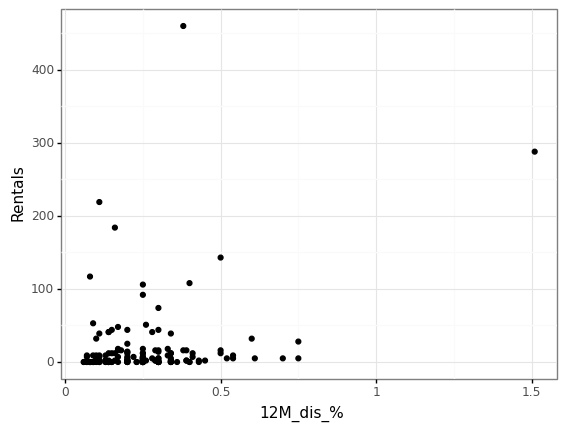

<ggplot: (174769262035)>

In [177]:
# Now, let's look at the discounts vs qty rentals (for items with discount)
    
ggplot(aes(x="1M_dis_%", y="Rentals"), df.loc[df["1M_dis_%"] != 0, :]) + geom_point() + theme_bw()
ggplot(aes(x="3M_dis_%", y="Rentals"), df.loc[df["3M_dis_%"] != 0, :]) + geom_point() + theme_bw()
ggplot(aes(x="6M_dis_%", y="Rentals"), df.loc[df["6M_dis_%"] != 0, :]) + geom_point() + theme_bw()
ggplot(aes(x="12M_dis_%", y="Rentals"), df.loc[df["12M_dis_%"] != 0, :]) + geom_point() + theme_bw()

In [ ]:
 # On the discounts is not too clear that higher discounts lead to higher rentals, there are too few items to judge

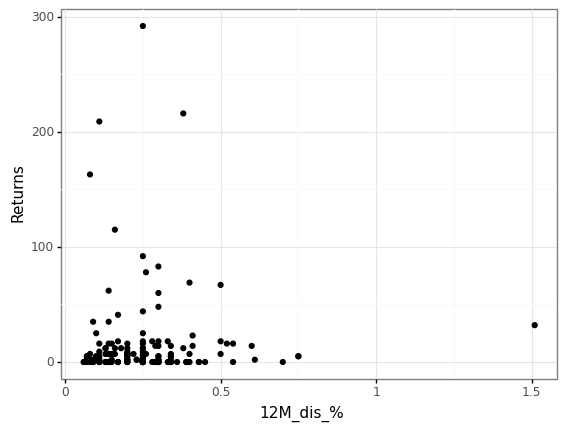

<ggplot: (174769454589)>

In [178]:
 # Now, let's see if the discounts are correlated with the qty of returns (for items with discount)
    
ggplot(aes(x="1M_dis_%", y="Returns"), df.loc[df["1M_dis_%"] != 0, :]) + geom_point() + theme_bw()
ggplot(aes(x="3M_dis_%", y="Returns"), df.loc[df["3M_dis_%"] != 0, :]) + geom_point() + theme_bw()
ggplot(aes(x="6M_dis_%", y="Returns"), df.loc[df["6M_dis_%"] != 0, :]) + geom_point() + theme_bw()
ggplot(aes(x="12M_dis_%", y="Returns"), df.loc[df["12M_dis_%"] != 0, :]) + geom_point() + theme_bw() 

In [ ]:
# In this case, you kind of can see that the higher the discount, maybe the less returns of the item

In [179]:
  # Now, let's see, for each value in subscriptions to buy new, what is the sum of rentals
    
df.groupby(by="subs_tobuy_new_1M", as_index=False).Rentals.sum().sort_values(by="subs_tobuy_new_1M", ascending=True) #the sweetspot happens when the monthly sub is 1/8 of the market price. After 8 subscriptions (8 months), rentals rapidly fall
df.groupby(by="subs_tobuy_new_3M", as_index=False).Rentals.sum().sort_values(by="subs_tobuy_new_3M", ascending=True) #the sweetspot happens when the quarterly sub is 1/4 of the market price. After 4 subscriptions(of 3 months, so 1 year), rentals rapidly fall
df.groupby(by="subs_tobuy_new_6M", as_index=False).Rentals.sum().sort_values(by="subs_tobuy_new_6M", ascending=True) #the sweetspot happens when the bi-annual sub is 1/2 of the market price. After 2 subscriptions(of 2 semesters, so 1 year), rentals rapidly fall
df.groupby(by="subs_tobuy_new_12M", as_index=False).Rentals.sum().sort_values(by="subs_tobuy_new_12M", ascending=True) #the sweetspot happens when the annual sub is close to the market price. After 1 subscriptions (of 12 months, so a year), rentals rapidly fall

,subs_tobuy_new_12M,Rentals
0,0.0,36
1,1.0,9773
2,2.0,4784
3,3.0,80
4,4.0,2
5,5.0,0
6,9.0,0
7,inf,0


In [180]:
df8=df.loc[:, ["Ranking", "Rentals", "Returns", "conversion", "rent_vs_rtrn", "Price_class", "rr_ratio"]]
df8

,Ranking,Rentals,Returns,conversion,rent_vs_rtrn,Price_class,rr_ratio
0,1,143,67,0.01,2.13,btwn 0.5-0.7 of mp,btwn 2 and 5
1,2,271,265,0.05,1.02,btwn 0.5-0.7 of mp,btwn 1 and 2
2,3,288,32,0.02,9.00,btwn 0.5-0.7 of mp,btwn 5 and 10
3,4,239,161,0.05,1.48,btwn 0.5-0.7 of mp,btwn 1 and 2
4,5,299,244,0.04,1.23,btwn 0.3-0.5 of mp,btwn 1 and 2
...,...,...,...,...,...,...,...
2134,2135,0,0,0.00,0.00,btwn 0.9-1 of mp,Zero
2135,2136,0,0,0.00,0.00,<0.3 of mp,Zero
2136,2137,0,0,0.00,0.00,btwn 0.3-0.5 of mp,Zero
2137,2138,0,0,0.00,0.00,more than double,Zero
